In [388]:
# Import libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [389]:
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [390]:
data.shape

(99999, 226)

In [391]:
len(data['mobile_number'].unique())

99999

### Missing Value Handling

In [392]:
## Mobile number is unique col, 
# Check percentage of empty value in other columns
def printMissingPercentage(df):
    print(round((df.isnull().sum()*100)/len(df),2))

printMissingPercentage(data)    

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [393]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [394]:
final_data = data.copy()

In [395]:
# Impute last day of the month
final_data['last_date_of_month_7'].fillna('7/31/2014',inplace=True)
final_data['last_date_of_month_8'].fillna('8/31/2014',inplace=True)
final_data['last_date_of_month_9'].fillna('9/30/2014',inplace=True)

In [396]:
# Impute all data columns with 0 considering user has not enabled internet so its data usage was 0
final_data['total_rech_data_6'].fillna(0,inplace=True)
final_data['total_rech_data_7'].fillna(0,inplace=True)
final_data['total_rech_data_8'].fillna(0,inplace=True)
final_data['total_rech_data_9'].fillna(0,inplace=True)

final_data['max_rech_data_6'].fillna(0,inplace=True)
final_data['max_rech_data_7'].fillna(0,inplace=True)
final_data['max_rech_data_8'].fillna(0,inplace=True)
final_data['max_rech_data_9'].fillna(0,inplace=True)

final_data['count_rech_2g_6'].fillna(0,inplace=True)
final_data['count_rech_2g_7'].fillna(0,inplace=True)
final_data['count_rech_2g_8'].fillna(0,inplace=True)
final_data['count_rech_2g_9'].fillna(0,inplace=True)

final_data['count_rech_3g_6'].fillna(0,inplace=True)
final_data['count_rech_3g_7'].fillna(0,inplace=True)
final_data['count_rech_3g_8'].fillna(0,inplace=True)
final_data['count_rech_3g_9'].fillna(0,inplace=True)

final_data['vol_2g_mb_6'].fillna(0,inplace=True)
final_data['vol_2g_mb_7'].fillna(0,inplace=True)
final_data['vol_2g_mb_8'].fillna(0,inplace=True)
final_data['vol_2g_mb_9'].fillna(0,inplace=True)

final_data['vol_3g_mb_6'].fillna(0,inplace=True)
final_data['vol_3g_mb_7'].fillna(0,inplace=True)
final_data['vol_3g_mb_8'].fillna(0,inplace=True)
final_data['vol_3g_mb_9'].fillna(0,inplace=True)

final_data['vol_3g_mb_6'].fillna(0,inplace=True)
final_data['vol_3g_mb_7'].fillna(0,inplace=True)
final_data['vol_3g_mb_8'].fillna(0,inplace=True)
final_data['vol_3g_mb_9'].fillna(0,inplace=True)

final_data['av_rech_amt_data_6'].fillna(0,inplace=True)
final_data['av_rech_amt_data_7'].fillna(0,inplace=True)
final_data['av_rech_amt_data_8'].fillna(0,inplace=True)
final_data['av_rech_amt_data_9'].fillna(0,inplace=True)

final_data['arpu_3g_6'].fillna(0,inplace=True)
final_data['arpu_3g_7'].fillna(0,inplace=True)
final_data['arpu_3g_8'].fillna(0,inplace=True)
final_data['arpu_3g_9'].fillna(0,inplace=True)

final_data['arpu_2g_6'].fillna(0,inplace=True)
final_data['arpu_2g_7'].fillna(0,inplace=True)
final_data['arpu_2g_8'].fillna(0,inplace=True)
final_data['arpu_2g_9'].fillna(0,inplace=True)

final_data['night_pck_user_6'].fillna(0,inplace=True)
final_data['night_pck_user_7'].fillna(0,inplace=True)
final_data['night_pck_user_8'].fillna(0,inplace=True)
final_data['night_pck_user_9'].fillna(0,inplace=True)

final_data['fb_user_6'].fillna(0,inplace=True)
final_data['fb_user_7'].fillna(0,inplace=True)
final_data['fb_user_8'].fillna(0,inplace=True)
final_data['fb_user_9'].fillna(0,inplace=True)

In [397]:
#Impute all the mou columns as 0 for na as total_og and total_ic are also 0 for these rows
col_to_impute = ["onnet_mou_6","onnet_mou_7","onnet_mou_8","onnet_mou_9",
                "offnet_mou_6","offnet_mou_7","offnet_mou_8","offnet_mou_9",
                "roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","roam_ic_mou_9",
                "roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","roam_og_mou_9",
                "loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8","loc_og_t2t_mou_9",
                "loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8","loc_og_t2m_mou_9",
                "loc_og_t2f_mou_6","loc_og_t2f_mou_7","loc_og_t2f_mou_8","loc_og_t2f_mou_9",
                "loc_og_t2c_mou_6","loc_og_t2c_mou_7","loc_og_t2c_mou_8","loc_og_t2c_mou_9",
                "loc_og_mou_6","loc_og_mou_7","loc_og_mou_8","loc_og_mou_9",
                "std_og_t2t_mou_6","std_og_t2t_mou_7","std_og_t2t_mou_8","std_og_t2t_mou_9",
                "std_og_t2m_mou_6","std_og_t2m_mou_7","std_og_t2m_mou_8","std_og_t2m_mou_9",
                "std_og_t2f_mou_6","std_og_t2f_mou_7","std_og_t2f_mou_8","std_og_t2f_mou_9",
                "std_og_mou_6","std_og_mou_7","std_og_mou_8","std_og_mou_9",
                "spl_og_mou_6","spl_og_mou_7","spl_og_mou_8","spl_og_mou_9",
                "loc_ic_t2t_mou_6","loc_ic_t2t_mou_7","loc_ic_t2t_mou_8","loc_ic_t2t_mou_9",
                "loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8","loc_ic_t2m_mou_9",
                "loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8","loc_ic_t2f_mou_9",
                "loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8","loc_ic_mou_9",
                "std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2t_mou_8","std_ic_t2t_mou_9",
                "std_ic_t2m_mou_6","std_ic_t2m_mou_7","std_ic_t2m_mou_8","std_ic_t2m_mou_9",
                "std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8","std_ic_t2f_mou_9",
                "std_ic_mou_6","std_ic_mou_7","std_ic_mou_8","std_ic_mou_9",
                "spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8","spl_ic_mou_9",
                "isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8","isd_ic_mou_9",
                "ic_others_6","ic_others_7","ic_others_8","ic_others_9",
                "std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8","std_ic_t2f_mou_9","og_others_6",
                "std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","std_ic_t2o_mou_9",
                "og_others_7","og_others_8","og_others_9","isd_og_mou_6","isd_og_mou_7","isd_og_mou_8","isd_og_mou_9",
                "std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9","loc_og_t2o_mou","std_og_t2o_mou",
                "loc_ic_t2o_mou"]

for col in col_to_impute:
    final_data[col].fillna(0,inplace=True)

In [398]:
printMissingPercentage(final_data)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              0.00
std_og_t2o_mou              0.00
loc_ic_t2o_mou              0.00
last_date_of_month_6        0.00
last_date_of_month_7        0.00
last_date_of_month_8        0.00
last_date_of_month_9        0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.00
onnet_mou_7                 0.00
onnet_mou_8                 0.00
onnet_mou_9                 0.00
offnet_mou_6                0.00
offnet_mou_7                0.00
offnet_mou_8                0.00
offnet_mou_9                0.00
roam_ic_mou_6               0.00
roam_ic_mou_7               0.00
roam_ic_mou_8               0.00
roam_ic_mou_9               0.00
roam_og_mou_6               0.00
roam_og_mou_7               0.00
roam_og_mou_8               0.00
roam_og_mou_9               0.00
loc_og_t2t_mou_6            0.00
loc_og_t2t

In [399]:

# Dropping last recharge date as it doesnt add any value for analysis we already have monthly recharge count
final_data = final_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"],axis=1)
final_data = final_data.drop(["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"],axis=1)

In [400]:
printMissingPercentage(final_data)

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.00
std_og_t2o_mou         0.00
loc_ic_t2o_mou         0.00
last_date_of_month_6   0.00
last_date_of_month_7   0.00
last_date_of_month_8   0.00
last_date_of_month_9   0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
onnet_mou_9            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
offnet_mou_9           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_ic_mou_9          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
roam_og_mou_9          0.00
loc_og_t2t_mou_6       0.00
loc_og_t2t_mou_7       0.00
loc_og_t2t_mou_8       0.00
loc_og_t2t_mou_9       0.00
loc_og_t2m_mou_6       0.00
loc_og_t2m_mou_7       0.00
loc_og_t2m_mou_8    

### Filter high value customer

In [401]:
# Calculate total recharge amount for data
final_data["total_rech_amt_data_6"]  = final_data["av_rech_amt_data_6"]*final_data["total_rech_data_6"]
final_data["total_rech_amt_data_7"]  = final_data["av_rech_amt_data_7"]*final_data["total_rech_data_7"]
final_data["total_rech_amt_data_8"]  = final_data["av_rech_amt_data_8"]*final_data["total_rech_data_8"]
final_data["total_rech_amt_data_9"]  = final_data["av_rech_amt_data_9"]*final_data["total_rech_data_9"]


In [402]:
# Calculate avegrate recharge amount in good phase as 6 and 7 month
final_data["avg_rech_amt_good"] = (final_data["total_rech_amt_6"] + final_data["total_rech_amt_data_6"] + final_data['total_rech_amt_7'] + final_data["total_rech_amt_data_7"] )/2

In [403]:
# Get the 70% quarentile amount
amount  = final_data["avg_rech_amt_good"].quantile(.7)
amount

478.0

In [404]:
# Filter rows which has amount >= quarentile amount.
final_data = final_data[final_data["avg_rech_amt_good"] >= amount]
len(final_data)

30001

### Perform clean up

In [405]:
# Drop all columns which are correlated with the new columns added
final_data = final_data.drop(["av_rech_amt_data_6","total_rech_data_6","av_rech_amt_data_7","total_rech_data_7"
                             ,"av_rech_amt_data_8","total_rech_data_8","av_rech_amt_data_9","total_rech_data_9",
                              "avg_rech_amt_good"
                              ],axis=1)

In [406]:
final_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,300

In [407]:
# Drop mobile number
final_data = final_data.drop("mobile_number",axis=1)

In [408]:
final_data  = final_data.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"],axis=1)

In [409]:
final_data.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00

In [410]:
col_with_0_std = []
for col in final_data.columns:
    if final_data[col].std() == 0:
        col_with_0_std.append(col)
col_with_0_std   

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [411]:
final_data  = final_data.drop(col_with_0_std,axis=1)

In [412]:
final_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,197.38,214.82,213.80,21.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,252.00,252.00,252.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,0.00,968,30.40,0.00,101.20,3.58,252.00,252.00,252.00,0.00
7,1069.18,1349.85,3171.48,500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0

In [413]:
## Considering good phase as june and july
### Action phase as Aug
final_data["arpu_good"] = final_data["arpu_6"] + final_data["arpu_7"]
final_data = final_data.drop(["arpu_6","arpu_7"],axis=1)

final_data["onnet_mou_good"] = final_data["onnet_mou_6"] + final_data["onnet_mou_7"]
final_data = final_data.drop(["onnet_mou_6","onnet_mou_7"],axis=1)

final_data["offnet_mou_good"] = final_data["offnet_mou_6"] + final_data["offnet_mou_7"]
final_data = final_data.drop(["offnet_mou_6","offnet_mou_7"],axis=1)

final_data["roam_ic_mou_good"] = final_data["roam_ic_mou_6"] + final_data["roam_ic_mou_7"]
final_data = final_data.drop(["roam_ic_mou_6","roam_ic_mou_7"],axis=1)

final_data["roam_og_mou_good"] = final_data["roam_og_mou_6"] + final_data["roam_og_mou_7"]
final_data = final_data.drop(["roam_og_mou_6","roam_og_mou_7"],axis=1)

final_data["loc_og_t2t_mou_good"] = final_data["loc_og_t2t_mou_6"] + final_data["loc_og_t2t_mou_7"]
final_data = final_data.drop(["loc_og_t2t_mou_6","loc_og_t2t_mou_7"],axis=1)

final_data["loc_og_t2m_mou_good"] = final_data["loc_og_t2m_mou_6"] + final_data["loc_og_t2m_mou_7"]
final_data = final_data.drop(["loc_og_t2m_mou_6","loc_og_t2m_mou_7"],axis=1)

final_data["loc_og_t2f_mou_good"] = final_data["loc_og_t2f_mou_6"] + final_data["loc_og_t2f_mou_7"]
final_data = final_data.drop(["loc_og_t2f_mou_6","loc_og_t2f_mou_7"],axis=1)

final_data["loc_og_t2c_mou_good"] = final_data["loc_og_t2c_mou_6"] + final_data["loc_og_t2c_mou_7"]
final_data = final_data.drop(["loc_og_t2c_mou_6","loc_og_t2c_mou_7"],axis=1)

final_data["loc_og_mou_good"] = final_data["loc_og_mou_6"] + final_data["loc_og_mou_7"]
final_data = final_data.drop(["loc_og_mou_6","loc_og_mou_7"],axis=1)

final_data["std_og_t2t_mou_good"] = final_data["std_og_t2t_mou_6"] + final_data["std_og_t2t_mou_7"]
final_data = final_data.drop(["std_og_t2t_mou_6","std_og_t2t_mou_7"],axis=1)

final_data["std_og_t2m_mou_good"] = final_data["std_og_t2m_mou_6"] + final_data["std_og_t2m_mou_7"]
final_data = final_data.drop(["std_og_t2m_mou_6","std_og_t2m_mou_7"],axis=1)

final_data["std_og_t2f_mou_good"] = final_data["std_og_t2f_mou_6"] + final_data["std_og_t2f_mou_7"]
final_data = final_data.drop(["std_og_t2f_mou_6","std_og_t2f_mou_7"],axis=1)

final_data["std_og_mou_good"] = final_data["std_og_mou_6"] + final_data["std_og_mou_7"]
final_data = final_data.drop(["std_og_mou_6","std_og_mou_7"],axis=1)

final_data["isd_og_mou_good"] = final_data["isd_og_mou_6"] + final_data["isd_og_mou_7"]
final_data = final_data.drop(["isd_og_mou_6","isd_og_mou_7"],axis=1)

final_data["spl_og_mou_good"] = final_data["spl_og_mou_6"] + final_data["spl_og_mou_7"]
final_data = final_data.drop(["spl_og_mou_6","spl_og_mou_7"],axis=1)

final_data["og_others_good"] = final_data["og_others_6"] + final_data["og_others_7"]
final_data = final_data.drop(["og_others_6","og_others_7"],axis=1)

final_data["total_og_mou_good"] = final_data["total_og_mou_6"] + final_data["total_og_mou_7"]
final_data = final_data.drop(["total_og_mou_6","total_og_mou_7"],axis=1)

final_data["loc_ic_t2t_mou_good"] = final_data["loc_ic_t2t_mou_6"] + final_data["loc_ic_t2t_mou_7"]
final_data = final_data.drop(["loc_ic_t2t_mou_6","loc_ic_t2t_mou_7"],axis=1)

final_data["loc_ic_t2m_mou_good"] = final_data["loc_ic_t2m_mou_6"] + final_data["loc_ic_t2m_mou_7"]
final_data = final_data.drop(["loc_ic_t2m_mou_6","loc_ic_t2m_mou_7"],axis=1)

final_data["loc_ic_t2f_mou_good"] = final_data["loc_ic_t2f_mou_6"] + final_data["loc_ic_t2f_mou_7"]
final_data = final_data.drop(["loc_ic_t2f_mou_6","loc_ic_t2f_mou_7"],axis=1)

final_data["loc_ic_mou_good"] = final_data["loc_ic_mou_6"] + final_data["loc_ic_mou_7"]
final_data = final_data.drop(["loc_ic_mou_6","loc_ic_mou_7"],axis=1)

final_data["std_ic_t2t_mou_good"] = final_data["std_ic_t2t_mou_6"] + final_data["std_ic_t2t_mou_7"]
final_data = final_data.drop(["std_ic_t2t_mou_6","std_ic_t2t_mou_7"],axis=1)

final_data["std_ic_t2m_mou_good"] = final_data["std_ic_t2m_mou_6"] + final_data["std_ic_t2m_mou_7"]
final_data = final_data.drop(["std_ic_t2m_mou_6","std_ic_t2m_mou_7"],axis=1)

final_data["std_ic_t2f_mou_good"] = final_data["std_ic_t2f_mou_6"] + final_data["std_ic_t2f_mou_7"]
final_data = final_data.drop(["std_ic_t2f_mou_6","std_ic_t2f_mou_7"],axis=1)

final_data["std_ic_mou_good"] = final_data["std_ic_mou_6"] + final_data["std_ic_mou_7"]
final_data = final_data.drop(["std_ic_mou_6","std_ic_mou_7"],axis=1)

final_data["total_ic_mou_good"] = final_data["total_ic_mou_6"] + final_data["total_ic_mou_7"]
final_data = final_data.drop(["total_ic_mou_6","total_ic_mou_7"],axis=1)

final_data["spl_ic_mou_good"] = final_data["spl_ic_mou_6"] + final_data["spl_ic_mou_7"]
final_data = final_data.drop(["spl_ic_mou_6","spl_ic_mou_7"],axis=1)

final_data["isd_ic_mou_good"] = final_data["isd_ic_mou_6"] + final_data["isd_ic_mou_7"]
final_data = final_data.drop(["isd_ic_mou_6","isd_ic_mou_7"],axis=1)

final_data["ic_others_good"] = final_data["ic_others_6"] + final_data["ic_others_7"]
final_data = final_data.drop(["ic_others_6","ic_others_7"],axis=1)

final_data["max_rech_amt_good"] = final_data["max_rech_amt_6"] + final_data["max_rech_amt_7"]
final_data = final_data.drop(["max_rech_amt_6","max_rech_amt_7"],axis=1)

final_data["last_day_rch_amt_good"] = final_data["last_day_rch_amt_6"] + final_data["last_day_rch_amt_7"]
final_data = final_data.drop(["last_day_rch_amt_6","last_day_rch_amt_7"],axis=1)

final_data["max_rech_data_good"] = final_data["max_rech_data_6"] + final_data["max_rech_data_7"]
final_data = final_data.drop(["max_rech_data_6","max_rech_data_7"],axis=1)

final_data["count_rech_2g_good"] = final_data["count_rech_2g_6"] + final_data["count_rech_2g_7"]
final_data = final_data.drop(["count_rech_2g_6","count_rech_2g_7"],axis=1)

final_data["count_rech_3g_good"] = final_data["count_rech_3g_6"] + final_data["count_rech_3g_7"]
final_data = final_data.drop(["count_rech_3g_6","count_rech_3g_7"],axis=1)

final_data["vol_2g_mb_good"] = final_data["vol_2g_mb_6"] + final_data["vol_2g_mb_7"]
final_data = final_data.drop(["vol_2g_mb_6","vol_2g_mb_7"],axis=1)

final_data["vol_3g_mb_good"] = final_data["vol_3g_mb_6"] + final_data["vol_3g_mb_7"]
final_data = final_data.drop(["vol_3g_mb_6","vol_3g_mb_7"],axis=1)

final_data["arpu_3g_good"] = final_data["arpu_3g_6"] + final_data["arpu_3g_7"]
final_data = final_data.drop(["arpu_3g_6","arpu_3g_7"],axis=1)

final_data["monthly_2g_good"] = final_data["monthly_2g_6"] + final_data["monthly_2g_7"]
final_data = final_data.drop(["monthly_2g_6","monthly_2g_7"],axis=1)

final_data["night_pck_user_good"] = final_data["night_pck_user_6"] + final_data["night_pck_user_7"]
final_data = final_data.drop(["night_pck_user_6","night_pck_user_7"],axis=1)

final_data["sachet_2g_good"] = final_data["sachet_2g_6"] + final_data["sachet_2g_7"]
final_data = final_data.drop(["sachet_2g_6","sachet_2g_7"],axis=1)

final_data["monthly_3g_good"] = final_data["monthly_3g_6"] + final_data["monthly_3g_7"]
final_data = final_data.drop(["monthly_3g_6","monthly_3g_7"],axis=1)

final_data["sachet_3g_good"] = final_data["sachet_3g_6"] + final_data["sachet_3g_7"]
final_data = final_data.drop(["sachet_3g_6","sachet_3g_7"],axis=1)

final_data["total_rech_num_good"] = final_data["total_rech_num_6"] + final_data["total_rech_num_7"]
final_data = final_data.drop(["total_rech_num_6","total_rech_num_7"],axis=1)

final_data["total_rech_amt_good"] = final_data["total_rech_amt_6"] + final_data["total_rech_amt_7"]
final_data = final_data.drop(["total_rech_amt_6","total_rech_amt_7"],axis=1)

final_data["total_rech_amt_data_good"] = final_data["total_rech_amt_data_6"] + final_data["total_rech_amt_data_7"]
final_data = final_data.drop(["total_rech_amt_data_6","total_rech_amt_data_7"],axis=1)

final_data["fb_user_good"] = final_data["fb_user_6"] + final_data["fb_user_7"]
final_data = final_data.drop(["fb_user_6","fb_user_7"],axis=1)


final_data["arpu_2g_good"] = final_data["arpu_2g_6"] + final_data["arpu_2g_7"]
final_data = final_data.drop(["arpu_2g_6","arpu_2g_7"],axis=1)


In [414]:
final_data.head()

,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_8,max_rech_data_9,count_rech_2g_8,count_rech_2g_9,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_8,arpu_3g_9,arpu_2g_8,arpu_2g_9,night_pck_user_8,night_pck_user_9,monthly_2g_8,monthly_2g_9,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_8,sachet_3g_9,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_8,total_rech_amt_data_9,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good
0,213.80,21.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,6,252,0,252,0,252,0,252.00,0.00,0.00,0.00,1.00,0.00,5.75,0.00,109.61,0.00,212.17,0.00,212.17,0.00,0.00,0.00,0,0,0,0,1,0,0,0,1.00,0.00,968,30.40,0.00,101.20,3.58,252.00,0.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34
7,3171.48,500.00,52.29,0.00,325.91,0.00,31.64,0.00,38.06,0.00,40.28,0.00,162.28,0.00,53.23,0.00,0.00,0.00,255.79,0.00,12.01,0.00,49.14,0.00,16.68,0.00,77.84,0.00,10.01,0.00,6.50,0.00,0.00,0.00,350.16,0.00,27.31,0.00,121.19,0.00,39.53,0.00,188.04,0.00,30.39,0.00,141.33,0.00,22.21,0.00,193.94,0.00,428.74,0.00,0.00,0.00,31.59,0.00,15.14,0.00,7,3,3638,0,1580,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,802,57.74,19.38,18.74,0.00,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,0.00
8,137.36,166.79,35.08,33.46,136.48,108.71,0.00,0.00,0.00,0.00,12.49,26.13,50.54,34.58,0.00,0.00,7.15,0.00,63.04,60.71,22.58,7.33,75.69,74.13,0.00,0.00,98.28,81.46,0.00,0.00,10.23,0.00,0.00,0.00,171.56,142.18,0.31,4.03,15.48,

In [415]:
final_data.rename(columns={
    "arpu_8":"arpu_action",
    "onnet_mou_8":"onnet_mou_action",
    "offnet_mou_8":"offnet_mou_action",
    "roam_ic_mou_8":"roam_ic_mou_action",
    "roam_og_mou_8":"roam_og_mou_action",
    "loc_og_t2t_mou_8":"loc_og_t2t_mou_action",
    "loc_og_t2m_mou_8":"loc_og_t2m_mou_action",
    "loc_og_t2f_mou_8":"loc_og_t2f_mou_action",
    "loc_og_t2c_mou_8":"loc_og_t2c_mou_action",
    "loc_og_mou_8":"loc_og_mou_action",
    "std_og_t2t_mou_8":"std_og_t2t_mou_action",
    "std_og_t2m_mou_8":"std_og_t2m_mou_action",
    "std_og_t2f_mou_8":"std_og_t2f_mou_action",
    "std_og_mou_8":"std_og_mou_action",
    "isd_og_mou_8":"isd_og_mou_action",
    "spl_og_mou_8":"spl_og_mou_action",
    "og_others_8":"og_others_action",
    "total_og_mou_8":"total_og_mou_action",
    "loc_ic_t2t_mou_8":"loc_ic_t2t_mou_action",
    "loc_ic_t2m_mou_8":"loc_ic_t2m_mou_action",
    "loc_ic_t2f_mou_8":"loc_ic_t2f_mou_action",
    "loc_ic_mou_8":"loc_ic_mou_action",
    "std_ic_t2t_mou_8":"std_ic_t2t_mou_action",
    "std_ic_t2m_mou_8":"std_ic_t2m_mou_action",
    "std_ic_t2f_mou_8":"std_ic_t2f_mou_action",
    "std_ic_mou_8":"std_ic_mou_action",
    "total_ic_mou_8":"total_ic_mou_action",
    "spl_ic_mou_8":"spl_ic_mou_action",
    "isd_ic_mou_8":"isd_ic_mou_action",
    "ic_others_8":"ic_others_action",
    "total_rech_num_8":"total_rech_num_action",
    "total_rech_amt_8":"total_rech_amt_action",
    "max_rech_amt_8":"max_rech_amt_action","fb_user_8":"fb_user_action","total_rech_amt_data_8":"total_rech_amt_data_action",
    "last_day_rch_amt_8":"last_day_rch_amt_action","monthly_3g_8":"monthly_3g_action","sachet_3g_8":"sachet_3g_action",
    "max_rech_data_8":"max_rech_data_action","monthly_2g_8":"monthly_2g_action","sachet_2g_8":"sachet_2g_action",
    "count_rech_2g_8":"count_rech_2g_action","arpu_2g_8":"arpu_2g_action","night_pck_user_8":"night_pck_user_action",
    "count_rech_3g_8":"count_rech_3g_action","vol_2g_mb_8":"vol_2g_mb_action","vol_3g_mb_8":"vol_3g_mb_action","arpu_3g_8":"arpu_3g_action"
},inplace=True)

In [416]:
final_data.head()

,arpu_action,arpu_9,onnet_mou_action,onnet_mou_9,offnet_mou_action,offnet_mou_9,roam_ic_mou_action,roam_ic_mou_9,roam_og_mou_action,roam_og_mou_9,loc_og_t2t_mou_action,loc_og_t2t_mou_9,loc_og_t2m_mou_action,loc_og_t2m_mou_9,loc_og_t2f_mou_action,loc_og_t2f_mou_9,loc_og_t2c_mou_action,loc_og_t2c_mou_9,loc_og_mou_action,loc_og_mou_9,std_og_t2t_mou_action,std_og_t2t_mou_9,std_og_t2m_mou_action,std_og_t2m_mou_9,std_og_t2f_mou_action,std_og_t2f_mou_9,std_og_mou_action,std_og_mou_9,isd_og_mou_action,isd_og_mou_9,spl_og_mou_action,spl_og_mou_9,og_others_action,og_others_9,total_og_mou_action,total_og_mou_9,loc_ic_t2t_mou_action,loc_ic_t2t_mou_9,loc_ic_t2m_mou_action,loc_ic_t2m_mou_9,loc_ic_t2f_mou_action,loc_ic_t2f_mou_9,loc_ic_mou_action,loc_ic_mou_9,std_ic_t2t_mou_action,std_ic_t2t_mou_9,std_ic_t2m_mou_action,std_ic_t2m_mou_9,std_ic_t2f_mou_action,std_ic_t2f_mou_9,std_ic_mou_action,std_ic_mou_9,total_ic_mou_action,total_ic_mou_9,spl_ic_mou_action,spl_ic_mou_9,isd_ic_mou_action,isd_ic_mou_9,ic_others_action,ic_others_9,total_rech_num_action,total_rech_num_9,total_rech_amt_action,total_rech_amt_9,max_rech_amt_action,max_rech_amt_9,last_day_rch_amt_action,last_day_rch_amt_9,max_rech_data_action,max_rech_data_9,count_rech_2g_action,count_rech_2g_9,count_rech_3g_action,count_rech_3g_9,vol_2g_mb_action,vol_2g_mb_9,vol_3g_mb_action,vol_3g_mb_9,arpu_3g_action,arpu_3g_9,arpu_2g_action,arpu_2g_9,night_pck_user_action,night_pck_user_9,monthly_2g_action,monthly_2g_9,sachet_2g_action,sachet_2g_9,monthly_3g_action,monthly_3g_9,sachet_3g_action,sachet_3g_9,fb_user_action,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,total_rech_amt_data_9,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good
0,213.80,21.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,6,252,0,252,0,252,0,252.00,0.00,0.00,0.00,1.00,0.00,5.75,0.00,109.61,0.00,212.17,0.00,212.17,0.00,0.00,0.00,0,0,0,0,1,0,0,0,1.00,0.00,968,30.40,0.00,101.20,3.58,252.00,0.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34
7,3171.48,500.00,52.29,0.00,325.91,0.00,31.64,0.00,38.06,0.00,40.28,0.00,162.28,0.00,53.23,0.00,0.00,0.00,255.79,0.00,12.01,0.00,49.14,0.00,16.68,0.00,77.84,0.00,10.01,0.00,6.50,0.00,0.00,0.00,350.16,0.00,27.31,0.00,121.19,0.00,39.53,0.00,188.04,0.00,30.39,0.00,141.33,0.00,22.21,0.00,193.94,0.00,428.74,0.00,0.00,0.00,31.59,0.00,15.14,0.00,7,3,3638,0,1580,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,802,57.74,19.38,18.74,0.00,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370

In [417]:
final_data["Churn"] = final_data["total_ic_mou_9"] + final_data["total_og_mou_9"] + final_data["vol_2g_mb_9"] + final_data["vol_3g_mb_9"] == 0

In [418]:
final_data["Churn"] = final_data["Churn"].map({True:1,False:0})

In [419]:
final_data.head()

,arpu_action,arpu_9,onnet_mou_action,onnet_mou_9,offnet_mou_action,offnet_mou_9,roam_ic_mou_action,roam_ic_mou_9,roam_og_mou_action,roam_og_mou_9,loc_og_t2t_mou_action,loc_og_t2t_mou_9,loc_og_t2m_mou_action,loc_og_t2m_mou_9,loc_og_t2f_mou_action,loc_og_t2f_mou_9,loc_og_t2c_mou_action,loc_og_t2c_mou_9,loc_og_mou_action,loc_og_mou_9,std_og_t2t_mou_action,std_og_t2t_mou_9,std_og_t2m_mou_action,std_og_t2m_mou_9,std_og_t2f_mou_action,std_og_t2f_mou_9,std_og_mou_action,std_og_mou_9,isd_og_mou_action,isd_og_mou_9,spl_og_mou_action,spl_og_mou_9,og_others_action,og_others_9,total_og_mou_action,total_og_mou_9,loc_ic_t2t_mou_action,loc_ic_t2t_mou_9,loc_ic_t2m_mou_action,loc_ic_t2m_mou_9,loc_ic_t2f_mou_action,loc_ic_t2f_mou_9,loc_ic_mou_action,loc_ic_mou_9,std_ic_t2t_mou_action,std_ic_t2t_mou_9,std_ic_t2m_mou_action,std_ic_t2m_mou_9,std_ic_t2f_mou_action,std_ic_t2f_mou_9,std_ic_mou_action,std_ic_mou_9,total_ic_mou_action,total_ic_mou_9,spl_ic_mou_action,spl_ic_mou_9,isd_ic_mou_action,isd_ic_mou_9,ic_others_action,ic_others_9,total_rech_num_action,total_rech_num_9,total_rech_amt_action,total_rech_amt_9,max_rech_amt_action,max_rech_amt_9,last_day_rch_amt_action,last_day_rch_amt_9,max_rech_data_action,max_rech_data_9,count_rech_2g_action,count_rech_2g_9,count_rech_3g_action,count_rech_3g_9,vol_2g_mb_action,vol_2g_mb_9,vol_3g_mb_action,vol_3g_mb_9,arpu_3g_action,arpu_3g_9,arpu_2g_action,arpu_2g_9,night_pck_user_action,night_pck_user_9,monthly_2g_action,monthly_2g_9,sachet_2g_action,sachet_2g_9,monthly_3g_action,monthly_3g_9,sachet_3g_action,sachet_3g_9,fb_user_action,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,total_rech_amt_data_9,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good,Churn
0,213.80,21.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,6,252,0,252,0,252,0,252.00,0.00,0.00,0.00,1.00,0.00,5.75,0.00,109.61,0.00,212.17,0.00,212.17,0.00,0.00,0.00,0,0,0,0,1,0,0,0,1.00,0.00,968,30.40,0.00,101.20,3.58,252.00,0.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34,1
7,3171.48,500.00,52.29,0.00,325.91,0.00,31.64,0.00,38.06,0.00,40.28,0.00,162.28,0.00,53.23,0.00,0.00,0.00,255.79,0.00,12.01,0.00,49.14,0.00,16.68,0.00,77.84,0.00,10.01,0.00,6.50,0.00,0.00,0.00,350.16,0.00,27.31,0.00,121.19,0.00,39.53,0.00,188.04,0.00,30.39,0.00,141.33,0.00,22.21,0.00,193.94,0.00,428.74,0.00,0.00,0.00,31.59,0.00,15.14,0.00,7,3,3638,0,1580,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,802,57.74,19.38,18.74,0.00,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0

In [420]:
# Drop all columns ending with 9
columns_with_9 = list(filter(lambda x: x[-1] == '9',final_data.columns.values.tolist()))
final_data = final_data.drop(columns_with_9,axis=1)

In [421]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,std_og_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,total_og_mou_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,std_ic_mou_action,total_ic_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,fb_user_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,1.00,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.00,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.00,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,1.00,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,1.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.00,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,10.64,179.74,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,1889.13,12.67,192.86,7.45,213.01,20.04,105.92,0.00,125.97,338.98,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,3

In [422]:
orignal_data = final_data.copy()

### Perform EDA

In [423]:
final_data.shape

(30001, 102)

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
final_data.Churn.value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

In [426]:
X = final_data.drop('Churn',axis = 1)
y = final_data['Churn']

In [427]:
 print(final_data[['std_ic_t2f_mou_action','std_ic_t2m_mou_action','std_ic_t2t_mou_action']].sum(axis=1) - final_data['std_ic_mou_action'])

 # Above shows that std_ic_mou_action is sum of std_ic_t2f_mou_action,std_ic_t2m_mou_action,std_ic_t2t_mou_action so dropping std_ic_mou_action to avoid correlation
final_data = final_data.drop('std_ic_mou_action',axis=1)

0        0.00
7       -0.01
8        0.00
21      -0.01
23       0.00
         ... 
99981    0.00
99984    0.00
99986    0.00
99988   -0.01
99997    0.00
Length: 30001, dtype: float64


In [428]:
final_data = final_data.drop('std_ic_mou_good',axis=1)

In [429]:
# Similar to incoming to avoid correlation
final_data = final_data.drop('std_og_mou_action',axis=1)

In [430]:
# Removing total_og_mou_action to avoid correlation as it is total of all types of og 
final_data = final_data.drop('total_og_mou_action',axis=1)

In [431]:
final_data = final_data.drop('total_og_mou_good',axis=1)

In [432]:
final_data = final_data.drop(['total_ic_mou_action','total_ic_mou_good'],axis=1)


In [433]:
final_data[final_data['total_rech_amt_data_good'] != 0]["fb_user_good"].value_counts()

2.00    13278
1.00     4691
0.00     1531
Name: fb_user_good, dtype: int64

In [434]:
# Only 1500 users doesnt access fb but have internet so dropping the column fb
final_data = final_data.drop(['fb_user_good','fb_user_action'],axis=1)

In [435]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,90.40,439.05,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,33.68,71.56,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,10.64,179.74,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,12.67,192.86,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,99.62,165.95,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,81.75,209.27,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,17

In [436]:
final_data[['loc_og_t2t_mou_action','loc_og_t2m_mou_action','loc_og_t2f_mou_action','loc_og_t2c_mou_action','loc_og_mou_action']].corr()

,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action
loc_og_t2t_mou_action,1.00,0.21,0.07,0.02,0.77
loc_og_t2m_mou_action,0.21,1.00,0.22,0.02,0.79
loc_og_t2f_mou_action,0.07,0.22,1.00,-0.00,0.24
loc_og_t2c_mou_action,0.02,0.02,-0.00,1.00,0.02
loc_og_mou_action,0.77,0.79,0.24,0.02,1.00


In [437]:
final_data[['loc_og_t2t_mou_good','loc_og_t2m_mou_good','loc_og_t2f_mou_good','loc_og_t2c_mou_good','loc_og_mou_good']].corr()

,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good
loc_og_t2t_mou_good,1.00,0.21,0.06,0.02,0.76
loc_og_t2m_mou_good,0.21,1.00,0.20,0.00,0.79
loc_og_t2f_mou_good,0.06,0.20,1.00,-0.01,0.22
loc_og_t2c_mou_good,0.02,0.00,-0.01,1.00,0.01
loc_og_mou_good,0.76,0.79,0.22,0.01,1.00


In [438]:
# loc_og_t2t_mou_good , loc_og_t2m_mou_good is highly correlated with loc_og_mou_good so dropping these two col
final_data = final_data.drop(['loc_og_t2t_mou_good','loc_og_t2m_mou_good'],axis=1)

In [439]:
final_data = final_data.drop(['loc_og_t2t_mou_action','loc_og_t2m_mou_action'],axis=1)

In [440]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,90.40,439.05,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,33.68,71.56,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,12.67,192.86,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,81.75,209.27,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0


In [441]:
final_data[['loc_ic_t2t_mou_action','loc_ic_t2m_mou_action','loc_ic_t2f_mou_action','loc_ic_mou_action']].corr()

,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action
loc_ic_t2t_mou_action,1.00,0.23,0.12,0.69
loc_ic_t2m_mou_action,0.23,1.00,0.25,0.85
loc_ic_t2f_mou_action,0.12,0.25,1.00,0.37
loc_ic_mou_action,0.69,0.85,0.37,1.00


In [442]:
# loc_ic_t2t_mou_action , loc_ic_t2m_mou_action is highly correlated with loc_og_mou_good so dropping these two col
final_data = final_data.drop(['loc_ic_t2t_mou_action','loc_ic_t2m_mou_action'],axis=1)

In [443]:
final_data = final_data.drop(['loc_ic_t2t_mou_good','loc_ic_t2m_mou_good'],axis=1)

In [444]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0


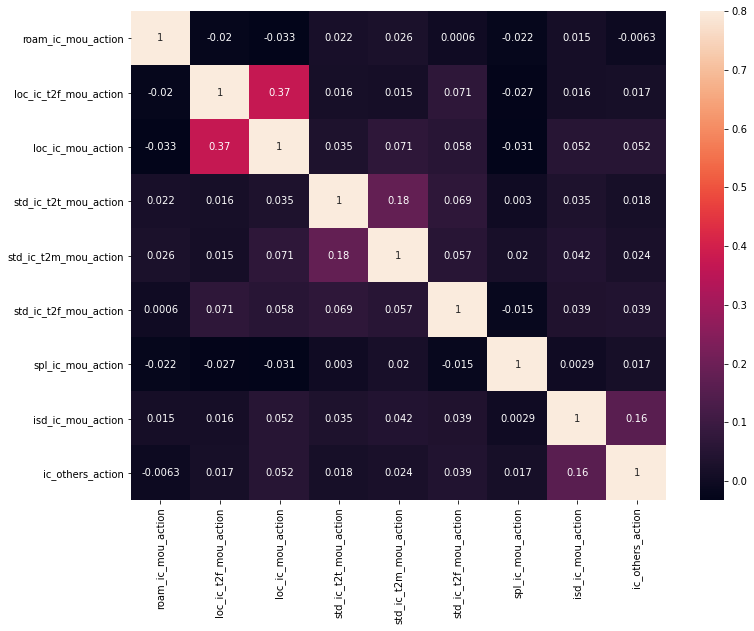

In [445]:
result = final_data[['roam_ic_mou_action','loc_ic_t2f_mou_action','loc_ic_mou_action','std_ic_t2t_mou_action','std_ic_t2m_mou_action',
           'std_ic_t2f_mou_action','spl_ic_mou_action','isd_ic_mou_action','ic_others_action']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

In [446]:
# Dropping loc_ic_t2f_mou_action as it is highly correlated with loc_mou_action
final_data = final_data.drop('loc_ic_t2f_mou_action',axis=1)

In [447]:
final_data = final_data.drop('loc_ic_t2f_mou_good',axis=1)

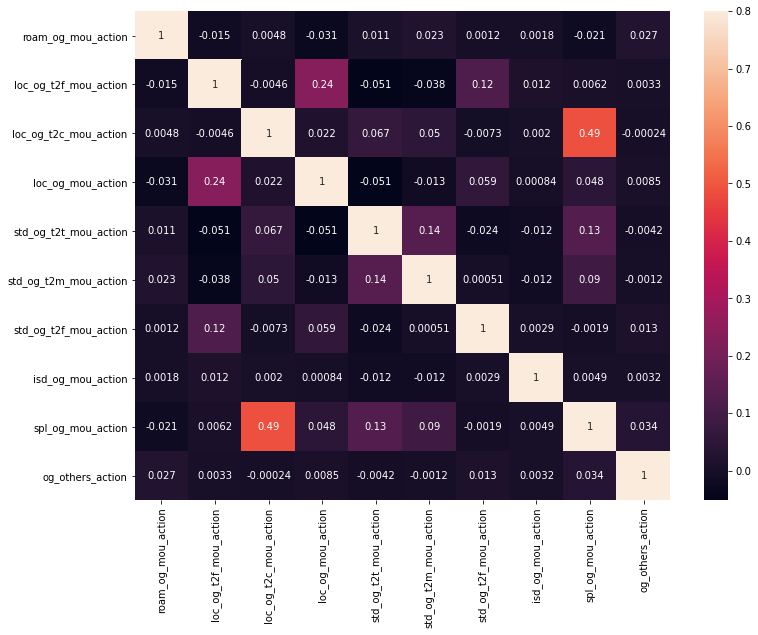

In [448]:
result = final_data[['roam_og_mou_action','loc_og_t2f_mou_action','loc_og_t2c_mou_action','loc_og_mou_action'
                     ,'std_og_t2t_mou_action','std_og_t2m_mou_action',
                       'std_og_t2f_mou_action','isd_og_mou_action','spl_og_mou_action','og_others_action']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

In [449]:
# Dropping loc_og_t2c_action  as it is highly correlated with spl_og_mou_action
final_data = final_data.drop('loc_og_t2c_mou_action',axis=1)

In [450]:
final_data = final_data.drop('loc_og_t2c_mou_good',axis=1)

In [451]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,53.23,255.79,12.01,49.14,16.68,10.01,6.50,0.00,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,0.00,63.04,22.58,75.69,0.00,0.00,10.23,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,1.58,129.74,61.79,876.99,0.00,0.00,0.00,0.00,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,0.00,182.14,0.00,39.61,0.00,0.00,17.71,0.00,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0


In [452]:
final_data['vbc_3g_good'] = final_data['jun_vbc_3g'] + final_data['jul_vbc_3g']
final_data.rename(columns={
    'aug_vbc_3g': 'vbc_3g_action'
},inplace=True)
final_data = final_data.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1)

In [453]:
final_data = final_data.drop('sep_vbc_3g',axis=1)

In [454]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn,vbc_3g_good
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1,101.20
7,3171.48,52.29,325.91,31.64,38.06,53.23,255.79,12.01,49.14,16.68,10.01,6.50,0.00,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1,38.12
8,137.36,35.08,136.48,0.00,0.00,0.00,63.04,22.58,75.69,0.00,0.00,10.23,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,207.00,870.94,764.72,175.29,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0,1032.81
21,637.76,85.14,983.39,0.00,0.00,1.58,129.74,61.79,876.99,0.00,0.00,0.00,0.00,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0,0.00
23,366.97,33.58,205.89,0.00,0.00,0.00,182.14,0.00,39.61,0.00,0.00,17.71,0.00,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,540.00,268.25,99.62,174.77,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0,51.86


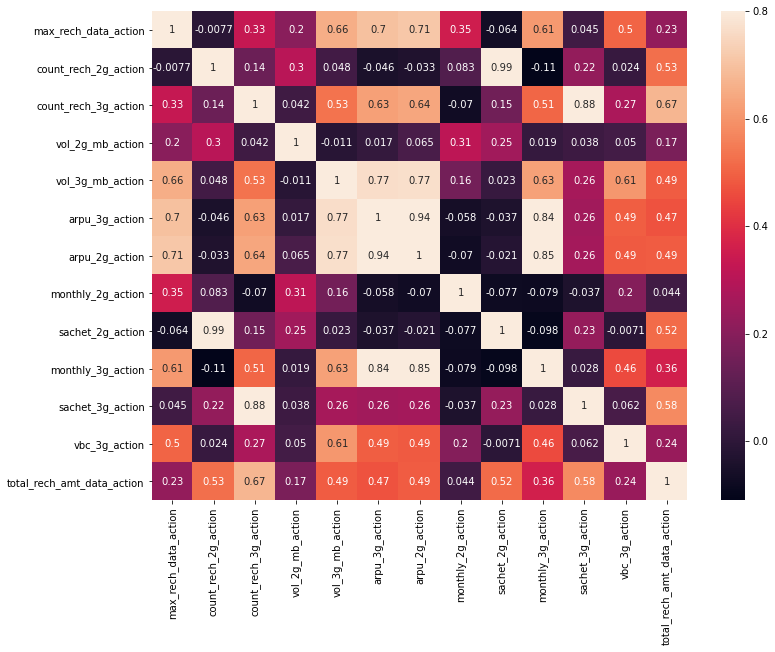

In [455]:
result_action = final_data[['max_rech_data_action','count_rech_2g_action','count_rech_3g_action',
                     'vol_2g_mb_action','vol_3g_mb_action','arpu_3g_action','arpu_2g_action',
                    'monthly_2g_action','sachet_2g_action','monthly_3g_action','sachet_3g_action',
                    'vbc_3g_action','total_rech_amt_data_action']].corr()


fig = plt.figure(figsize = (12, 9))
sns.heatmap(result_action, vmax = .8, annot=True)
plt.show()

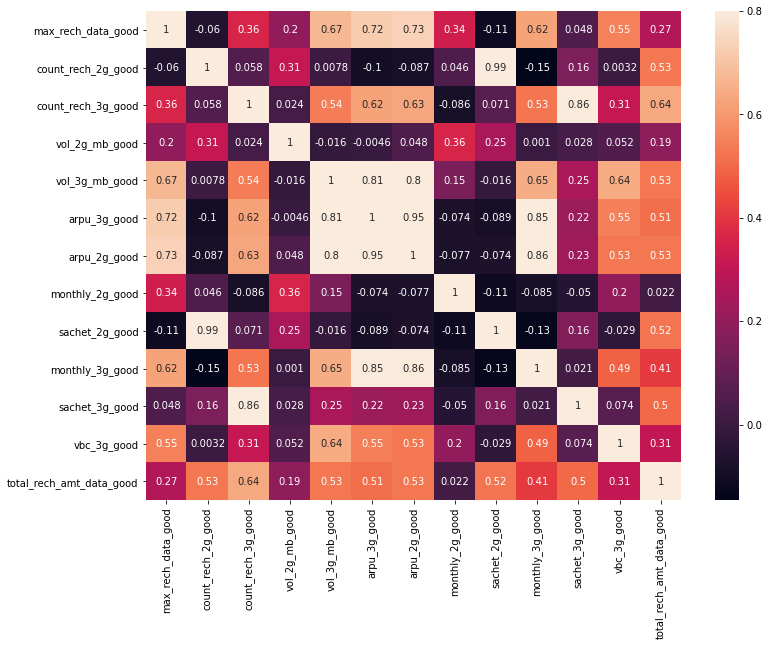

In [456]:
result_good = final_data[['max_rech_data_good','count_rech_2g_good','count_rech_3g_good',
                     'vol_2g_mb_good','vol_3g_mb_good','arpu_3g_good','arpu_2g_good',
                    'monthly_2g_good','sachet_2g_good','monthly_3g_good','sachet_3g_good',
                    'vbc_3g_good','total_rech_amt_data_good']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result_good, vmax = .8, annot=True)
plt.show()

In [457]:
# dropping sachet_3g , arpu_3g , arpu_2g , sachet_2g,sacht_3g for high correlation
final_data = final_data.drop(['sachet_3g_good','sachet_3g_action','arpu_3g_action',
                              'arpu_3g_good','arpu_2g_good','arpu_2g_action',
                              'sachet_2g_good','sachet_2g_action','sachet_3g_good',
                             'sachet_3g_action'],axis=1)

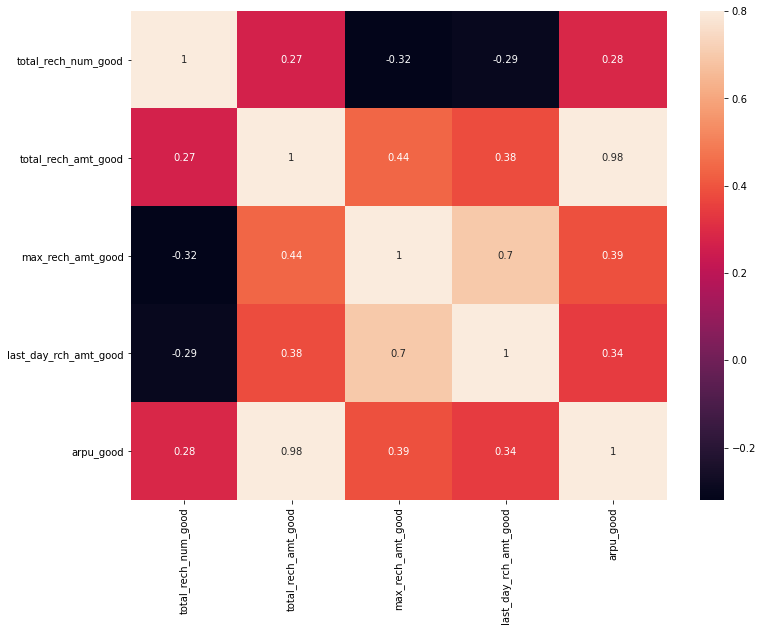

In [458]:
result = final_data[['total_rech_num_good','total_rech_amt_good','max_rech_amt_good','last_day_rch_amt_good','arpu_good']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

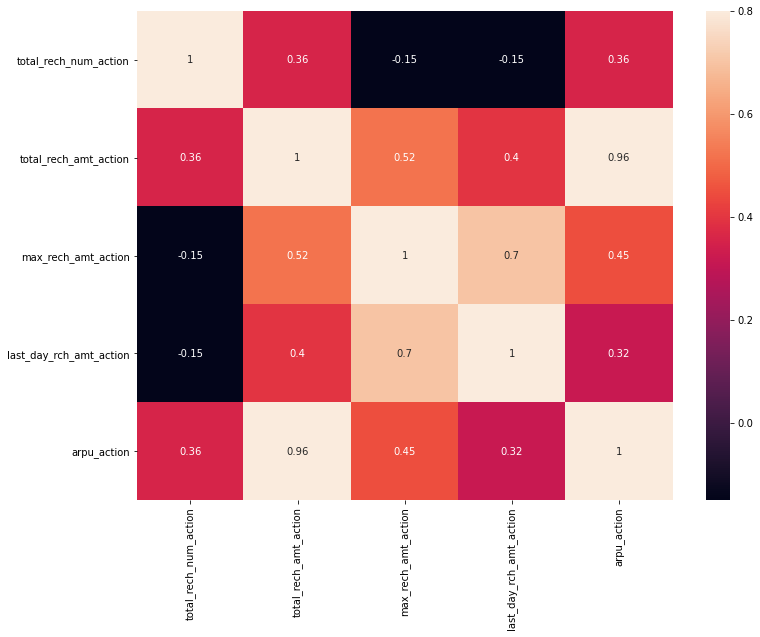

In [459]:
result = final_data[['total_rech_num_action','total_rech_amt_action','max_rech_amt_action','last_day_rch_amt_action','arpu_action']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

In [460]:
# Drpping arpu
final_data = final_data.drop(['arpu_good','arpu_action'],axis=1)

In [461]:
final_data.head()

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,night_pck_user_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,night_pck_user_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,Churn,vbc_3g_good
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,0.00,0,1,968,30.40,252.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,0,0.00,2,7,614,504.00,1,101.20
7,52.29,325.91,31.64,38.06,53.23,255.79,12.01,49.14,16.68,10.01,6.50,0.00,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,802,57.74,0.00,112.52,1020.59,49.72,36.33,117.27,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,10,2370,0.00,1,38.12
8,35.08,136.48,0.00,0.00,0.00,63.04,22.58,75.69,0.00,0.00,10.23,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,0.00,0,0,315,21.03,207.00,764.72,175.29,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,1,0.00,0,40,1038,354.00,0,1032.81
21,85.14,983.39,0.00,0.00,1.58,129.74,61.79,876.99,0.00,0.00,0.00,0.00,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,720,0.00,0.00,234.52,1654.61,0.00,0.00,0.75,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0,0.00,0,48,1280,0.00,0,0.00
23,33.58,205.89,0.00,0.00,0.00,182.14,0.00,39.61,0.00,0.00,17.71,0.00,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,0.00,0,1,604,40.45,540.00,99.62,174.77,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,0,0.00,2,8,454,712.00,0,51.86


In [462]:
final_data.shape

(30001, 69)

In [463]:
final_data.head()

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,night_pck_user_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,night_pck_user_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,Churn,vbc_3g_good
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,0.00,0,1,968,30.40,252.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,0,0.00,2,7,614,504.00,1,101.20
7,52.29,325.91,31.64,38.06,53.23,255.79,12.01,49.14,16.68,10.01,6.50,0.00,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,802,57.74,0.00,112.52,1020.59,49.72,36.33,117.27,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,10,2370,0.00,1,38.12
8,35.08,136.48,0.00,0.00,0.00,63.04,22.58,75.69,0.00,0.00,10.23,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,0.00,0,0,315,21.03,207.00,764.72,175.29,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,1,0.00,0,40,1038,354.00,0,1032.81
21,85.14,983.39,0.00,0.00,1.58,129.74,61.79,876.99,0.00,0.00,0.00,0.00,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,720,0.00,0.00,234.52,1654.61,0.00,0.00,0.75,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0,0.00,0,48,1280,0.00,0,0.00
23,33.58,205.89,0.00,0.00,0.00,182.14,0.00,39.61,0.00,0.00,17.71,0.00,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,0.00,0,1,604,40.45,540.00,99.62,174.77,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,0,0.00,2,8,454,712.00,0,51.86


In [464]:
final_data['Churn'].value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

In [465]:
final_data.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.98,.99])

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,night_pck_user_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,night_pck_user_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,Churn,vbc_3g_good
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00
mean,234.11,335.08,12.50,19.87,5.89,235.73,148.44,157.35,1.58,1.95,6.56,0.06,223.26,13.91,27.92,2.56,0.03,11.00,1.22,9.97,584.37,160.14,92.39,72.49,1.21,0.41,105.91,351.49,0.01,0.15,0.21,1209.37,169.14,463.25,528.61,751.80,28.75,46.72,12.77,509.20,340.12,367.35,3.63,711.11,4.28,12.93,0.70,465.46,30.32,60.02,5.49,0.08,22.66,2.65,341.49,201.25,157.92,2.64,0.88,251.62,714.46,0.36,0.03,0.45,23.57,1321.23,984.01,0.08,337.40
std,458.45,482.06,74.13,104.72,19.50,363.37,397.56,409.10,10.93,44.71,20.31,3.32,308.32,71.34,103.34,19.90,0.11,70.60,12.78,9.27,611.25,173.21,145.18,110.57,2.54,1.28,313.38,919.02,0.11,0.41,0.62,957.68,420.97,1622.77,879.16,915.27,132.16,186.56,41.91,716.45,771.22,787.78,23.06,1166.12,89.44,34.63,4.93,601.93,150.11,187.92,35.82,0.30,146.47,27.46,308.39,231.86,206.42,4.80,2.23,600.06,1679.97,0.78,0.20,1.14,17.27,1030.35,2477.07,0.27,785.55
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,228.00,0.00,0.00,0.00,6.94,0.00,0.00,0.00,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.84,0.00,0.00,0.00,0.00,0.00,0.00,66.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,354.00,0.00,0.00,0.00
10%,0.00,2.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.03,0.00,0.00,0.00,0.00,0.00,0.00,2.00,56.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,284.00,0.00,0.00,4.80,36.84,0.00,0.00,0.00,16.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.69,0.00,0.00,0.00,0.00,0.00,0.00,100.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,500.00,0.00,0.00,0.00
25%,10.39,46.74,0.00,0.00,0.00,22.46,0.00,0.00,0.00,0.00,0.00,0.00,40.53,0.00,0.00,0.00,0.00,0.00,0.00,4.00,250.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,

In [466]:
col_with_all_0 = []
for col in final_data.columns:
    if (final_data[col].quantile(.90) == 0) & (col != 'Churn'):
        col_with_all_0.append(col)
        
col_with_all_0        

# final_data = final_data.drop(col_with_0,axis=1)

['isd_og_mou_action',
 'og_others_action',
 'spl_ic_mou_action',
 'night_pck_user_action',
 'night_pck_user_good']

In [467]:
final_data[col_with_all_0].describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.98,.99])

,isd_og_mou_action,og_others_action,spl_ic_mou_action,night_pck_user_action,night_pck_user_good
count,30001.00,30001.00,30001.00,30001.00,30001.00
mean,1.95,0.06,0.03,0.01,0.03
std,44.71,3.32,0.11,0.11,0.20
min,0.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00
10%,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00
90%,0.00,0.00,0.00,0.00,0.00


In [468]:
final_data = final_data.drop(col_with_all_0,axis=1)

In [469]:
final_data.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.98,.99,.999,.9999,.99999])

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,spl_og_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,Churn,vbc_3g_good
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00
mean,234.11,335.08,12.50,19.87,5.89,235.73,148.44,157.35,1.58,6.56,223.26,13.91,27.92,2.56,11.00,1.22,9.97,584.37,160.14,92.39,72.49,1.21,0.41,105.91,351.49,0.15,0.21,1209.37,169.14,463.25,528.61,751.80,28.75,46.72,12.77,509.20,340.12,367.35,3.63,711.11,4.28,12.93,0.70,465.46,30.32,60.02,5.49,0.08,22.66,2.65,341.49,201.25,157.92,2.64,0.88,251.62,714.46,0.36,0.45,23.57,1321.23,984.01,0.08,337.40
std,458.45,482.06,74.13,104.72,19.50,363.37,397.56,409.10,10.93,20.31,308.32,71.34,103.34,19.90,70.60,12.78,9.27,611.25,173.21,145.18,110.57,2.54,1.28,313.38,919.02,0.41,0.62,957.68,420.97,1622.77,879.16,915.27,132.16,186.56,41.91,716.45,771.22,787.78,23.06,1166.12,89.44,34.63,4.93,601.93,150.11,187.92,35.82,0.30,146.47,27.46,308.39,231.86,206.42,4.80,2.23,600.06,1679.97,0.78,1.14,17.27,1030.35,2477.07,0.27,785.55
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,228.00,0.00,0.00,0.00,6.94,0.00,0.00,0.00,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.84,0.00,0.00,0.00,0.00,0.00,0.00,66.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,354.00,0.00,0.00,0.00
10%,0.00,2.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.03,0.00,0.00,0.00,0.00,0.00,2.00,56.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,284.00,0.00,0.00,4.80,36.84,0.00,0.00,0.00,16.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.69,0.00,0.00,0.00,0.00,0.00,0.00,100.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,500.00,0.00,0.00,0.00
25%,10.39,46.74,0.00,0.00,0.00,22.46,0.00,0.00,0.00,0.00,40.53,0.00,0.00,0.00,0.00,0.00,4.00,250.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,0.00,0.00,41.24,166.29,0.00,0.00,0.00,80.30,0.00,1.00,0.00,3.68,0.00,0.00,0.00,112.49,0.00,1.40,0.00,0.00,0.00,0.00,204.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,818.00,0.00,0.00,0.00
50%,65.61,182.79,0.00,0.00,0.00,110.81,0.63,9.46,0.00,0.43,128.73,0.11,3.71,0.00,0.00,0.00,8.0

In [470]:
final_data['Churn'].value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

In [471]:
final_data.shape

(30001, 64)

In [472]:
# Removing all outliers who are above 99%
for col in final_data.columns:
    val1 = final_data[col].quantile(.999)
    val2 = final_data[col].quantile(.9999)
    if val2-val1 > 1000:
        final_data = final_data[final_data[col] <= val1]
final_data.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.98,.99,.999,.9999,.99999])        

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,spl_og_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,Churn,vbc_3g_good
count,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00,29132.00
mean,221.96,321.95,10.30,17.36,5.88,230.34,141.42,147.77,1.51,6.49,218.08,11.57,24.68,2.23,9.26,1.18,9.80,555.02,154.34,89.14,70.67,1.20,0.38,99.77,319.90,0.15,0.20,1214.86,157.99,406.88,505.49,723.11,24.44,41.12,12.75,497.74,327.60,346.85,3.47,677.92,2.63,12.69,0.70,455.09,25.27,53.46,4.63,0.08,19.94,2.58,332.93,196.64,154.10,2.62,0.82,239.44,651.12,0.36,0.42,23.24,1264.96,881.75,0.08,314.07
std,399.96,424.00,49.39,83.44,19.56,327.58,358.37,349.41,10.23,20.21,279.70,40.79,68.03,13.64,49.06,12.26,8.93,445.82,143.55,121.15,105.17,2.45,1.07,267.66,718.41,0.40,0.57,960.23,366.49,1023.61,780.37,811.03,93.28,148.01,42.09,649.47,703.66,689.46,21.71,1040.61,26.91,31.38,4.98,541.81,77.85,130.17,19.55,0.30,120.21,27.17,277.67,211.03,194.36,4.65,1.88,522.28,1289.90,0.77,1.03,16.79,720.69,1692.07,0.27,677.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,228.00,0.00,0.00,0.00,6.72,0.00,0.00,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.50,0.00,0.00,0.00,0.00,0.00,0.00,66.00,3.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,351.00,0.00,0.00,0.00
10%,0.00,2.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.09,0.00,0.00,0.00,0.00,0.00,2.00,51.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,284.00,0.00,0.00,4.72,36.09,0.00,0.00,0.00,16.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.11,0.00,0.00,0.00,0.00,0.00,0.00,100.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,494.10,0.00,0.00,0.00
25%,10.23,45.94,0.00,0.00,0.00,22.39,0.00,0.00,0.00,0.00,40.68,0.00,0.00,0.00,0.00,0.00,4.00,250.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,461.00,0.00,0.00,40.82,164.97,0.00,0.00,0.00,80.73,0.00,0.98,0.00,3.58,0.00,0.00,0.00,113.14,0.00,1.39,0.00,0.00,0.00,0.00,201.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,808.00,0.00,0.00,0.00
50%,64.79,180.47,0.00,0.00,0.00,111.02,0.56,9.23,0.00,0.41,128.92,0.10,3.64,0.00,0.00,0.00,7.00,482.0

In [473]:
final_data = final_data[final_data["isd_ic_mou_good"] <=  2426.85]

In [474]:
final_data['Churn'].value_counts()

0    26776
1     2353
Name: Churn, dtype: int64

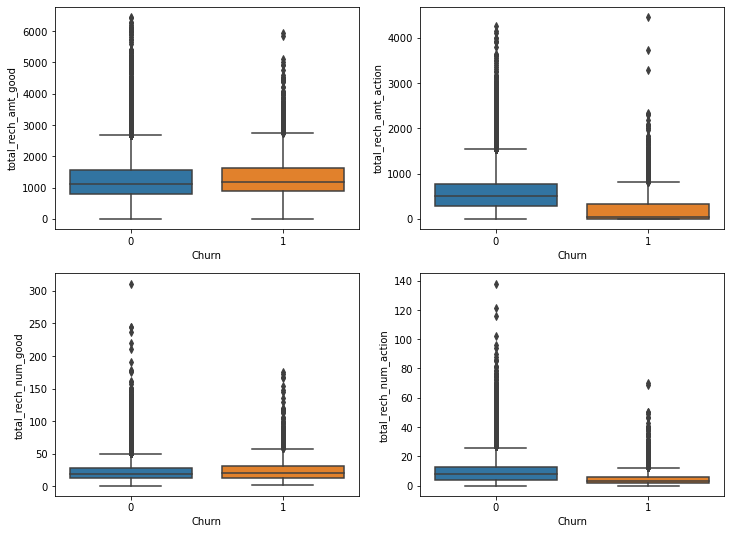

In [304]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(x="Churn", y="total_rech_amt_good",data=final_data,ax= ax1)
sns.boxplot(x = "Churn", y = "total_rech_amt_action",data=final_data  , ax= ax2)
sns.boxplot(x="Churn", y="total_rech_num_good",data=final_data,ax= ax3)
sns.boxplot(x = "Churn", y = "total_rech_num_action",data=final_data  , ax= ax4)

plt.show()

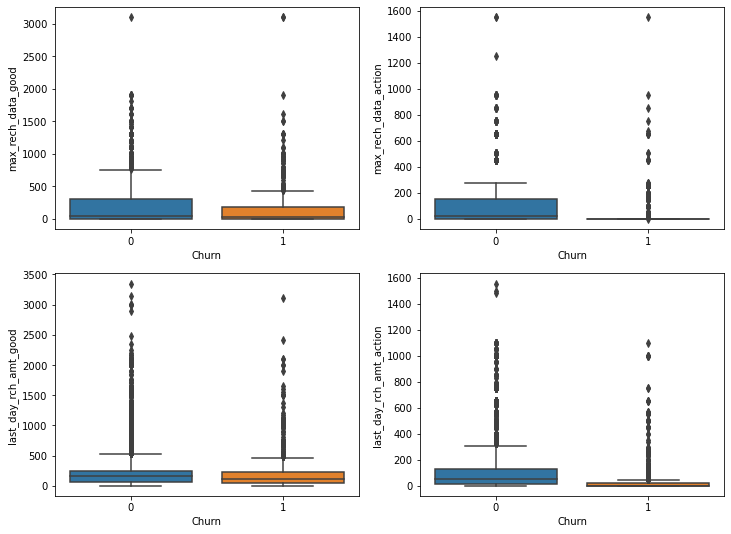

In [305]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(x="Churn", y="max_rech_data_good",data=final_data,ax= ax1)
sns.boxplot(x = "Churn", y = "max_rech_data_action",data=final_data  , ax= ax2)
sns.boxplot(x="Churn", y="last_day_rch_amt_good",data=final_data,ax= ax3)
sns.boxplot(x = "Churn", y = "last_day_rch_amt_action",data=final_data  , ax= ax4)

plt.show()

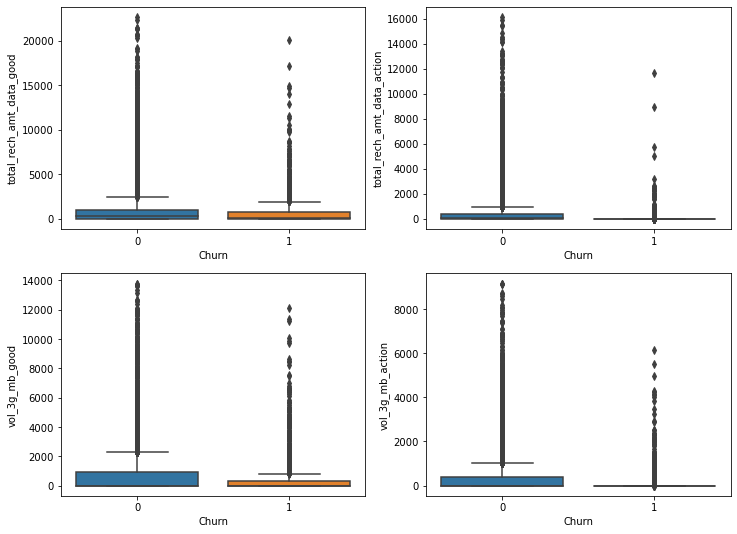

In [306]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(x="Churn", y="total_rech_amt_data_good",data=final_data,ax= ax1)
sns.boxplot(x = "Churn", y = "total_rech_amt_data_action",data=final_data  , ax= ax2)
sns.boxplot(x="Churn", y="vol_3g_mb_good",data=final_data,ax= ax3)
sns.boxplot(x = "Churn", y = "vol_3g_mb_action",data=final_data  , ax= ax4)

plt.show()

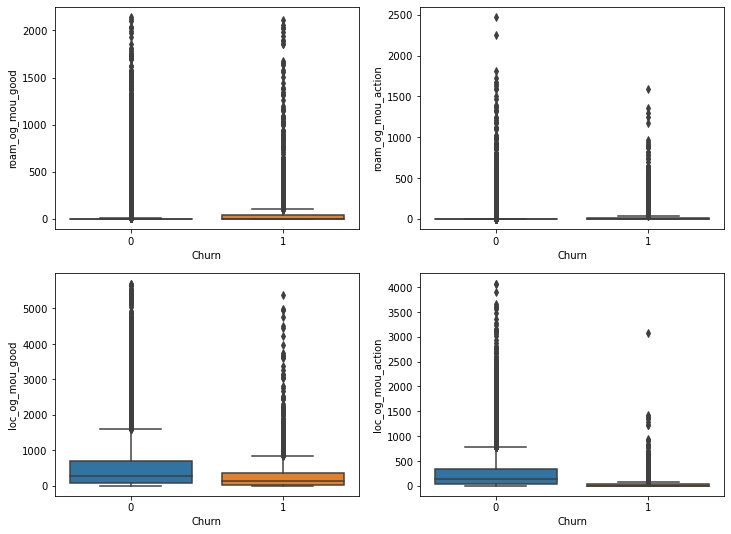

In [307]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(x="Churn", y="roam_og_mou_good",data=final_data,ax= ax1)
sns.boxplot(x = "Churn", y = "roam_og_mou_action",data=final_data  , ax= ax2)
sns.boxplot(x="Churn", y="loc_og_mou_good",data=final_data,ax= ax3)
sns.boxplot(x = "Churn", y = "loc_og_mou_action",data=final_data  , ax= ax4)

plt.show()

In [308]:
final_data.head()

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,spl_og_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,Churn,vbc_3g_good
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,0,1,968,30.40,252.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,0,2,7,614,504.00,1,101.20
8,35.08,136.48,0.00,0.00,0.00,63.04,22.58,75.69,0.00,10.23,15.79,0.10,0.65,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,0,0,315,21.03,207.00,764.72,175.29,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,1,0,40,1038,354.00,0,1032.81
21,85.14,983.39,0.00,0.00,1.58,129.74,61.79,876.99,0.00,0.00,159.11,0.18,101.74,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0,0,720,0.00,0.00,234.52,1654.61,0.00,0.00,0.75,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0,0,48,1280,0.00,0,0.00
23,33.58,205.89,0.00,0.00,0.00,182.14,0.00,39.61,0.00,17.71,224.21,13.38,43.91,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,0,1,604,40.45,540.00,99.62,174.77,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,0,2,8,454,712.00,0,51.86
38,666.38,97.81,0.00,0.00,0.00,28.44,656.89,78.84,0.00,0.00,29.43,5.59,13.41,0.00,1.20,0.00,6,416,130,130,0.00,0.00,0.00,0.00,0.00,0,0,1155,0.00,0.00,868.95,139.44,0.00,0.00,0.00,97.17,821.74,89.47,0.00,911.22,0.00,0.00,0.00,75.21,23.90,20.52,0.00,0.00,19.08,0.00,140,40,0.00,0.00,0.00,0.00,0.00,0,0,49,1056,0.00,0,0.00


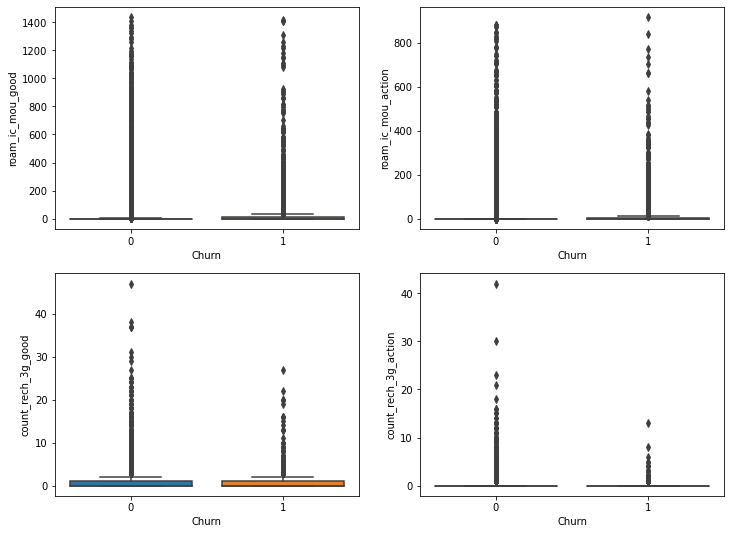

In [475]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(x="Churn", y="roam_ic_mou_good",data=final_data,ax= ax1)
sns.boxplot(x = "Churn", y = "roam_ic_mou_action",data=final_data  , ax= ax2)
sns.boxplot(x="Churn", y="count_rech_3g_good",data=final_data,ax= ax3)
sns.boxplot(x = "Churn", y = "count_rech_3g_action",data=final_data  , ax= ax4)

plt.show()

### Model buildng

In [476]:
final_data['Churn'].value_counts()

0    26776
1     2353
Name: Churn, dtype: int64

### Train test split

In [477]:
from sklearn.model_selection import train_test_split
X = final_data.drop('Churn',axis=1)
y = final_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100,stratify=y)


In [481]:
print(X_train.shape)
print(X_test.shape)

(20390, 63)
(8739, 63)


In [482]:
print(sum(y_train==1))
print(sum(y_test==1))

1647
706


### Feature Scaling

In [484]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=col)
X_test = pd.DataFrame(X_test,columns=col)

X_train.head()

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,spl_og_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,vbc_3g_good
0,0.11,0.17,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.04,0.20,0.19,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.00,0.11,0.19,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.18,0.00,0.00
1,0.04,0.31,0.00,0.00,0.00,0.00,0.04,0.32,0.00,0.01,0.01,0.03,0.01,0.00,0.01,0.00,0.16,0.16,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.07,0.55,0.00,0.00,0.00,0.00,0.07,0.60,0.00,0.59,0.00,0.00,0.00,0.00,0.05,0.02,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.28,0.00,0.00
2,0.02,0.05,0.00,0.00,0.02,0.07,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.03,0.00,0.05,0.21,0.16,0.17,0.16,0.00,0.05,0.00,0.14,0.00,0.25,0.30,0.08,0.06,0.02,0.06,0.00,0.00,0.01,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.02,0.00,0.00,0.11,0.07,0.26,0.00,0.04,0.01,0.12,0.00,0.17,0.03,0.15,0.02,0.12
3,0.05,0.11,0.00,0.00,0.00,0.09,0.00,0.07,0.00,0.00,0.15,0.00,0.01,0.00,0.00,0.00,0.03,0.56,0.64,0.67,0.16,0.00,0.05,0.02,0.24,0.00,0.25,0.00,0.22,0.06,0.05,0.18,0.00,0.00,0.00,0.10,0.01,0.13,0.00,0.13,0.01,0.00,0.00,0.19,0.00,0.03,0.00,0.01,0.01,0.00,0.45,0.33,0.26,0.00,0.06,0.00,0.22,0.00,0.25,0.02,0.48,0.06,0.19
4,0.13,0.03,0.00,0.00,0.03,0.03,0.13,0.00,0.00,0.15,0.08,0.01,0.01,0.00,0.00,0.00,0.12,0.17,0.08,0.07,0.06,0.03,0.00,0.00,0.05,0.00,0.00,0.02,0.02,0.01,0.25,0.04,0.06,0.04,0.00,0.02,0.23,0.01,0.00,0.24,0.00,0.16,0.00,0.06,0.05,0.01,0.00,0.05,0.00,0.00,0.05,0.04,0.08,0.04,0.00,0.00,0.02,0.11,0.00,0.12,0.30,0.04,0.01


### Logistic Regression

In [485]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression()

penalty = ['l1','l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

C:\Users\supsengu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [486]:
print(grid_result.best_params_)

{'C': 1291.5496650148827, 'penalty': 'l2'}


In [487]:
from sklearn import metrics

def printStats(model,X,y,fromPipeline = False):
    y_pred = model.predict(X)
    confusion = metrics.confusion_matrix(y,y_pred)
    print("Confusion Matrix:::",confusion)
    print("Recall score: ",metrics.recall_score(y,y_pred))
    print("Precison Score: ",metrics.precision_score(y,y_pred))
    print("Overall Accuracy: ",metrics.accuracy_score(y,y_pred))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Specificity :",TN / float(TN+FP))
    if fromPipeline == False:
        data = {'Feature': X.columns.values.tolist(),'Importance':list(model.coef_[0])}
        df = pd.DataFrame(data)
        df = df.sort_values(by = 'Importance',key=lambda col: abs(col), ascending=False)
        print(df)
    else:
        data = {'Feature': X.columns.values.tolist(),'Importance':list(model.named_steps['classification'].coef_[0])}
        df = pd.DataFrame(data)
        df = df.sort_values(by = 'Importance',key=lambda col: abs(col), ascending=False)
        print(df)
 

In [488]:
printStats(grid_result.best_estimator_,X_train,y_train)

Confusion Matrix::: [[18530   213]
 [ 1171   476]]
Recall score:  0.28901032179720704
Precison Score:  0.690856313497823
Overall Accuracy:  0.9321235899950956
Specificity : 0.9886357573494104
                       Feature  Importance
10           loc_ic_mou_action      -22.91
22        count_rech_3g_action       -9.95
16       total_rech_num_action       -8.99
21        count_rech_2g_action       -8.43
19     last_day_rch_amt_action       -7.45
11       std_ic_t2t_mou_action       -7.08
49              ic_others_good       -5.54
8        std_og_t2f_mou_action       -5.28
12       std_ic_t2m_mou_action       -5.09
43             loc_ic_mou_good        5.00
1            offnet_mou_action       -4.57
5            loc_og_mou_action       -4.46
13       std_ic_t2f_mou_action       -4.34
23            vol_2g_mb_action       -4.06
3           roam_og_mou_action        3.79
28               vbc_3g_action       -3.53
54          count_rech_3g_good        3.30
15            ic_others_action    

In [489]:
printStats(grid_result.best_estimator_,X_test,y_test)

Confusion Matrix::: [[7929  104]
 [ 519  187]]
Recall score:  0.26487252124645894
Precison Score:  0.6426116838487973
Overall Accuracy:  0.928710378761872
Specificity : 0.9870534047055894
                       Feature  Importance
10           loc_ic_mou_action      -22.91
22        count_rech_3g_action       -9.95
16       total_rech_num_action       -8.99
21        count_rech_2g_action       -8.43
19     last_day_rch_amt_action       -7.45
11       std_ic_t2t_mou_action       -7.08
49              ic_others_good       -5.54
8        std_og_t2f_mou_action       -5.28
12       std_ic_t2m_mou_action       -5.09
43             loc_ic_mou_good        5.00
1            offnet_mou_action       -4.57
5            loc_og_mou_action       -4.46
13       std_ic_t2f_mou_action       -4.34
23            vol_2g_mb_action       -4.06
3           roam_og_mou_action        3.79
28               vbc_3g_action       -3.53
54          count_rech_3g_good        3.30
15            ic_others_action        

### Using DecisionTreeClassifier

In [490]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import plot_tree

In [491]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'min_samples_split':[5,10,20,30,50]
}
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv=5,
            n_jobs=-1,verbose=1,
            scoring="precision")

grid_result = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


In [492]:
grid_result.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=5,
                       random_state=42)

In [493]:
dt_best = grid_result.best_estimator_

In [494]:
# Helper function to display tree
def get_dt_gradh(dt_classifier,X):
    plt.figure(figsize=(60,30))
    annotations = plot_tree(dt_classifier, feature_names = X.columns,class_names=['No Churn', "Churn"],filled=True);
    return

# Helper funciton to evaluate decision tree
def evaluate_model(dt_classifier,X,y,printFeatures = True,fromPipeline= False):
    y_pred = dt_classifier.predict(X)
    confusion = metrics.confusion_matrix(y,y_pred)
    print("Confusion Matrix:::",confusion)
    print("Recall score: ",metrics.recall_score(y,y_pred))
    print("Precison Score: ",metrics.precision_score(y,y_pred))
    print("Overall Accuracy: ",metrics.accuracy_score(y,y_pred))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Specificity :",TN / float(TN+FP))
#     print(dt_classifier.feature_importances_)
    if printFeatures == True & fromPipeline == False:
        data = {'Feature': X.columns.values.tolist(),'Importance':list(dt_classifier.feature_importances_)}
        df = pd.DataFrame(data)
        df = df.sort_values(by = 'Importance',key=lambda col: abs(col), ascending=False)
        print(df)
    elif printFeatures == True & fromPipeline == True:
        data = {'Feature': X.columns.values.tolist(),'Importance':list(dt_classifier.named_steps['classification'].feature_importances_)}
        df = pd.DataFrame(data)
        df = df.sort_values(by = 'Importance',key=lambda col: abs(col), ascending=False)
        print(df)    

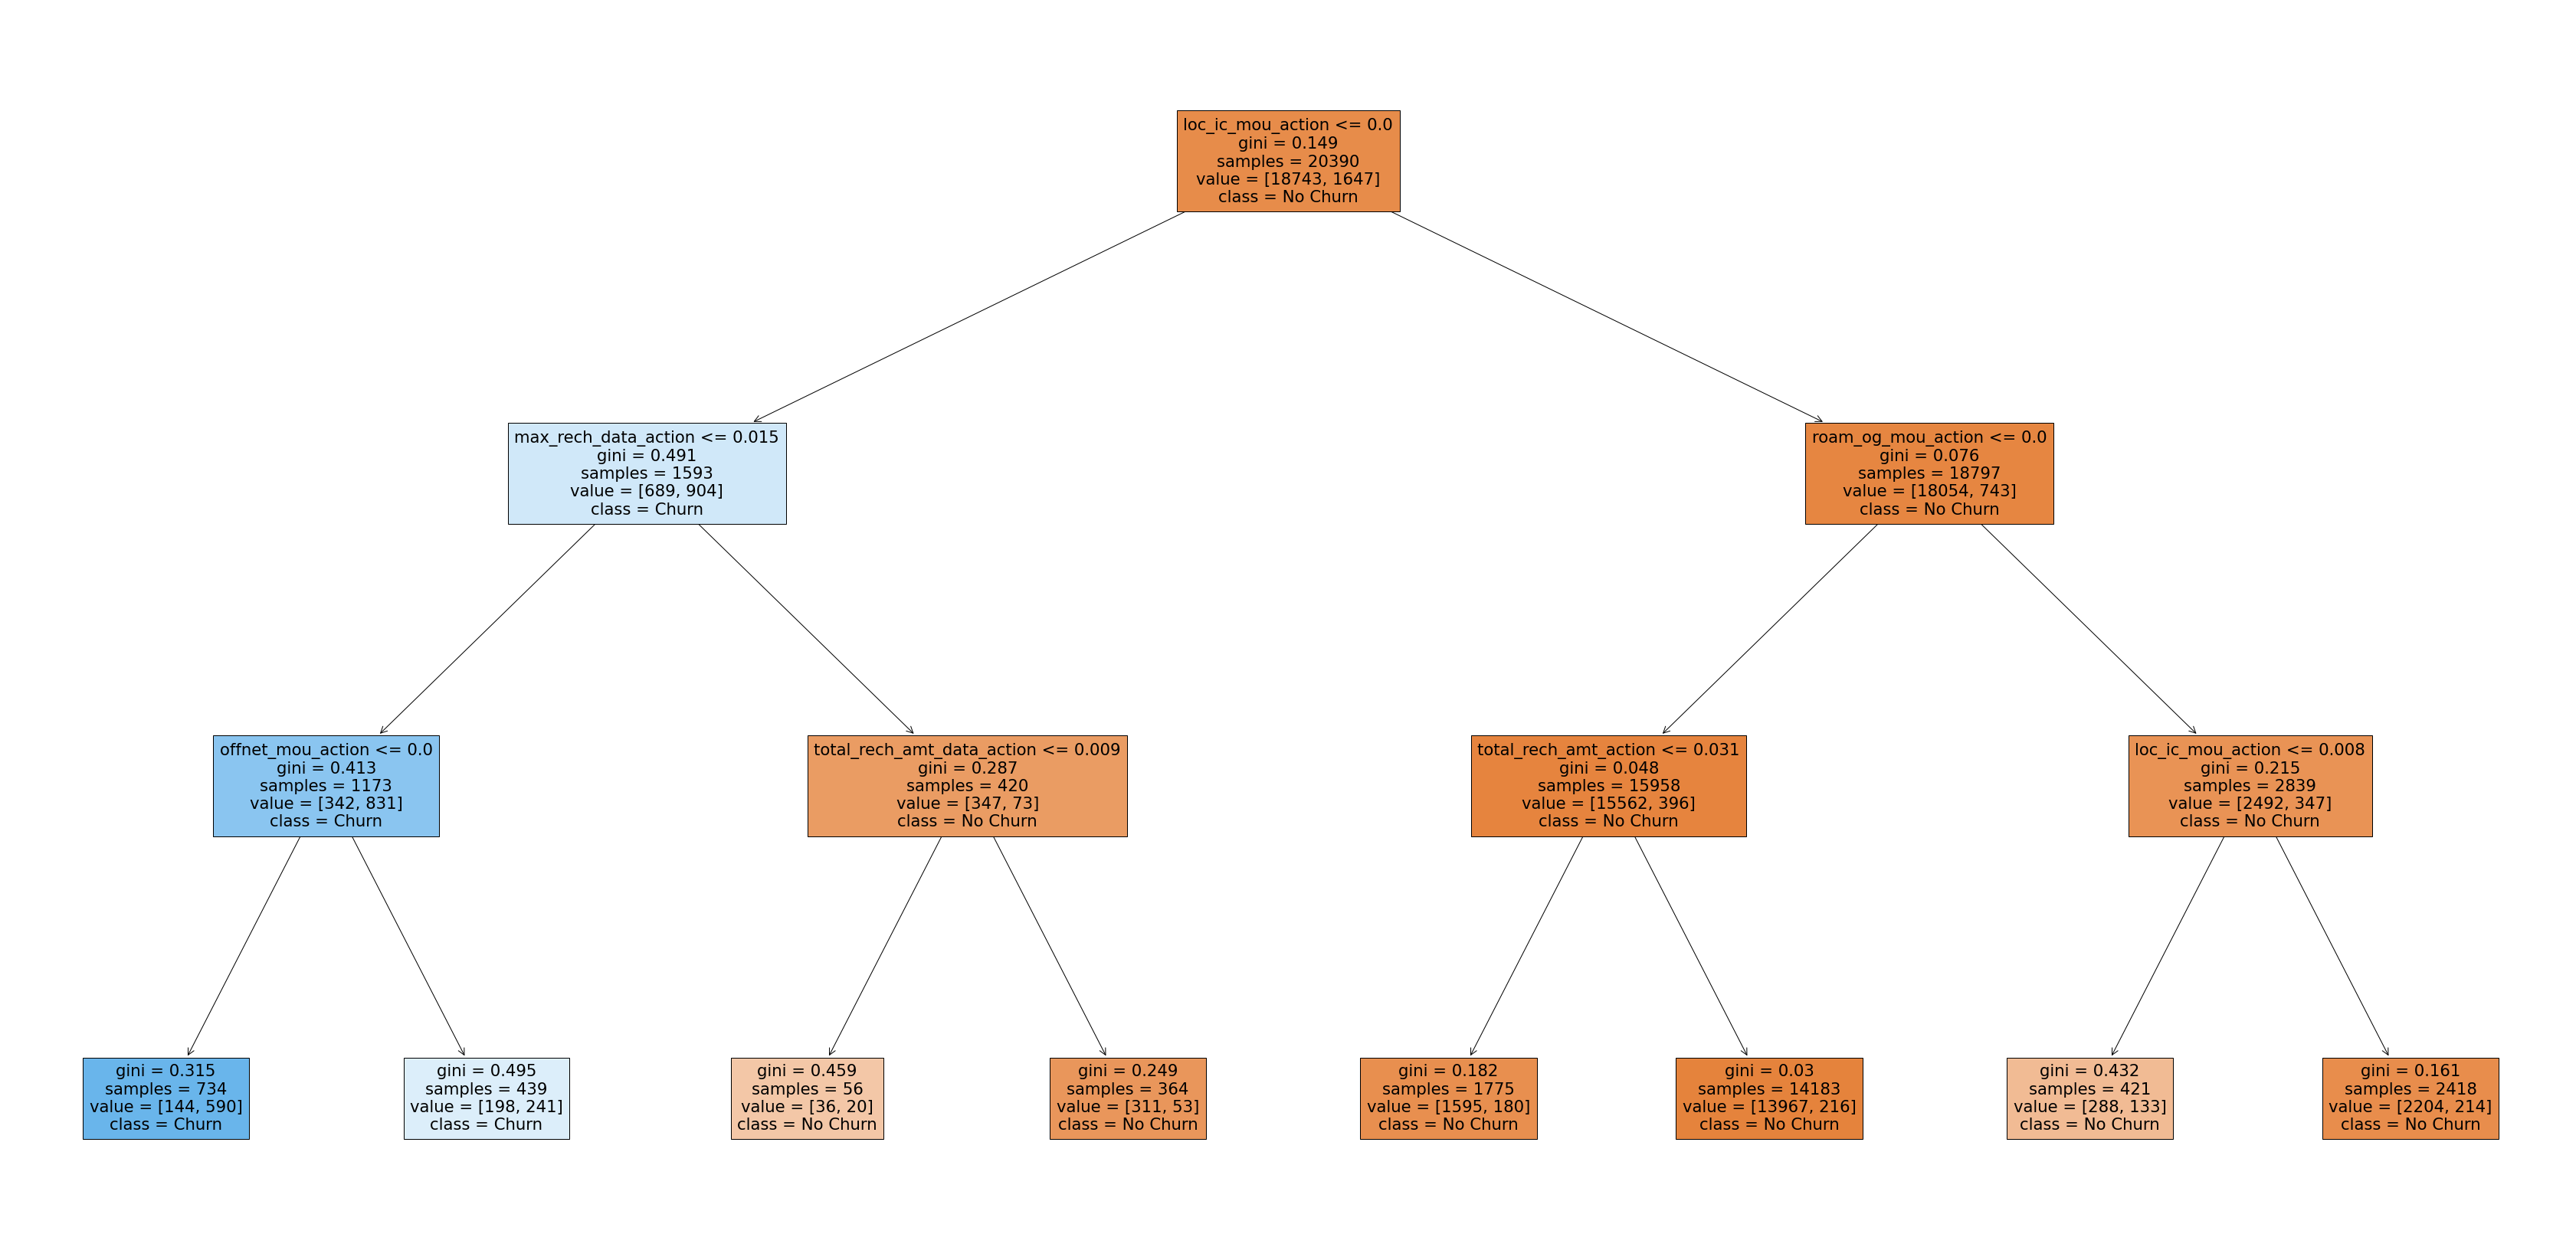

In [495]:
get_dt_gradh(dt_best,X_train)

In [496]:
evaluate_model(dt_best,X_train,y_train)

Confusion Matrix::: [[18401   342]
 [  816   831]]
Recall score:  0.5045537340619308
Precison Score:  0.7084398976982097
Overall Accuracy:  0.9432074546346249
Specificity : 0.9817531878567999


In [497]:
evaluate_model(dt_best,X_test,y_test)

Confusion Matrix::: [[7879  154]
 [ 353  353]]
Recall score:  0.5
Precison Score:  0.6962524654832347
Overall Accuracy:  0.9419842087195331
Specificity : 0.9808290800448152


### Using data handling imbalance technique

In [498]:
# Using oversampling technique
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1647
Before OverSampling, counts of label '0': 18743 



### Logistic Regression

In [499]:
from imblearn.pipeline import Pipeline

model = Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('classification', LogisticRegression())
    ])
hyperparameters = [{'classification__penalty': ('l1', 'l2'), 'classification__C': (0.01, 0.1, 1.0, 10,100,1000)}]

grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, n_jobs=-1, cv=5, scoring='precision',return_train_score=True)
grid_result = grid_search.fit(X_train,y_train)

C:\Users\supsengu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.23956738        nan 0.27811729        nan 0.28838495
        nan 0.29046878        nan 0.28993794        nan 0.29063032]
  warnings.warn(
C:\Users\supsengu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [       nan 0.23990906        nan 0.27962256        nan 0.2894438
        nan 0.29216603        nan 0.29229575        nan 0.29282839]
  warnings.warn(
C:\Users\supsengu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    ht

In [500]:
print(grid_result.best_params_)
print(grid_result.best_estimator_)

{'classification__C': 1000, 'classification__penalty': 'l2'}
Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('classification', LogisticRegression(C=1000))])


In [501]:
model = grid_result.best_estimator_
# model.fit(X_train,y_train)

In [502]:
printStats(model,X_train,y_train,True)

Confusion Matrix::: [[15412  3331]
 [  287  1360]]
Recall score:  0.8257437765634487
Precison Score:  0.28991686207631634
Overall Accuracy:  0.8225600784698381
Specificity : 0.8222803179853813
                       Feature  Importance
10           loc_ic_mou_action      -21.12
22        count_rech_3g_action      -19.64
21        count_rech_2g_action      -11.53
11       std_ic_t2t_mou_action       -9.12
49              ic_others_good       -8.81
15            ic_others_action        8.68
8        std_og_t2f_mou_action       -8.54
12       std_ic_t2m_mou_action       -8.21
16       total_rech_num_action       -8.21
1            offnet_mou_action       -7.30
5            loc_og_mou_action       -6.98
19     last_day_rch_amt_action       -6.92
43             loc_ic_mou_good        6.47
29  total_rech_amt_data_action        5.86
54          count_rech_3g_good        5.35
3           roam_og_mou_action        5.08
13       std_ic_t2f_mou_action       -4.73
42              og_others_good   

In [503]:
printStats(model,X_test,y_test,True)

Confusion Matrix::: [[6610 1423]
 [ 129  577]]
Recall score:  0.8172804532577904
Precison Score:  0.2885
Overall Accuracy:  0.8224053095319831
Specificity : 0.8228557201543633
                       Feature  Importance
10           loc_ic_mou_action      -21.12
22        count_rech_3g_action      -19.64
21        count_rech_2g_action      -11.53
11       std_ic_t2t_mou_action       -9.12
49              ic_others_good       -8.81
15            ic_others_action        8.68
8        std_og_t2f_mou_action       -8.54
12       std_ic_t2m_mou_action       -8.21
16       total_rech_num_action       -8.21
1            offnet_mou_action       -7.30
5            loc_og_mou_action       -6.98
19     last_day_rch_amt_action       -6.92
43             loc_ic_mou_good        6.47
29  total_rech_amt_data_action        5.86
54          count_rech_3g_good        5.35
3           roam_og_mou_action        5.08
13       std_ic_t2f_mou_action       -4.73
42              og_others_good       -4.45
23     

### Using DecisionTreeClassifier

In [508]:
dt = DecisionTreeClassifier(random_state=42)

model = Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('classification', dt)
    ])
hyperparameters = [{'classification__max_depth': (2,3,5), 
                    'classification__min_samples_leaf': (5,10,20,50,100),
                   'classification__min_samples_split': (5,10,20,30,50)}]

grid_search = GridSearchCV(estimator=model,
            param_grid=hyperparameters,
            cv=5,
            n_jobs=-1,verbose=1,
            scoring="precision")

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                                       ('classification',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classification__max_depth': (2, 3, 5, 10, 20, 50),
                          'classification__min_samples_leaf': (5, 10, 20, 50,
                                                               100),
                          'classification__min_samples_split': (5, 10, 20, 30,
                                                                50)}],
             scoring='precision', verbose=1)

In [509]:
dt_best = grid_search.best_estimator_

In [510]:
dt_best

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('classification',
                 DecisionTreeClassifier(max_depth=50, min_samples_leaf=20,
                                        min_samples_split=5,
                                        random_state=42))])

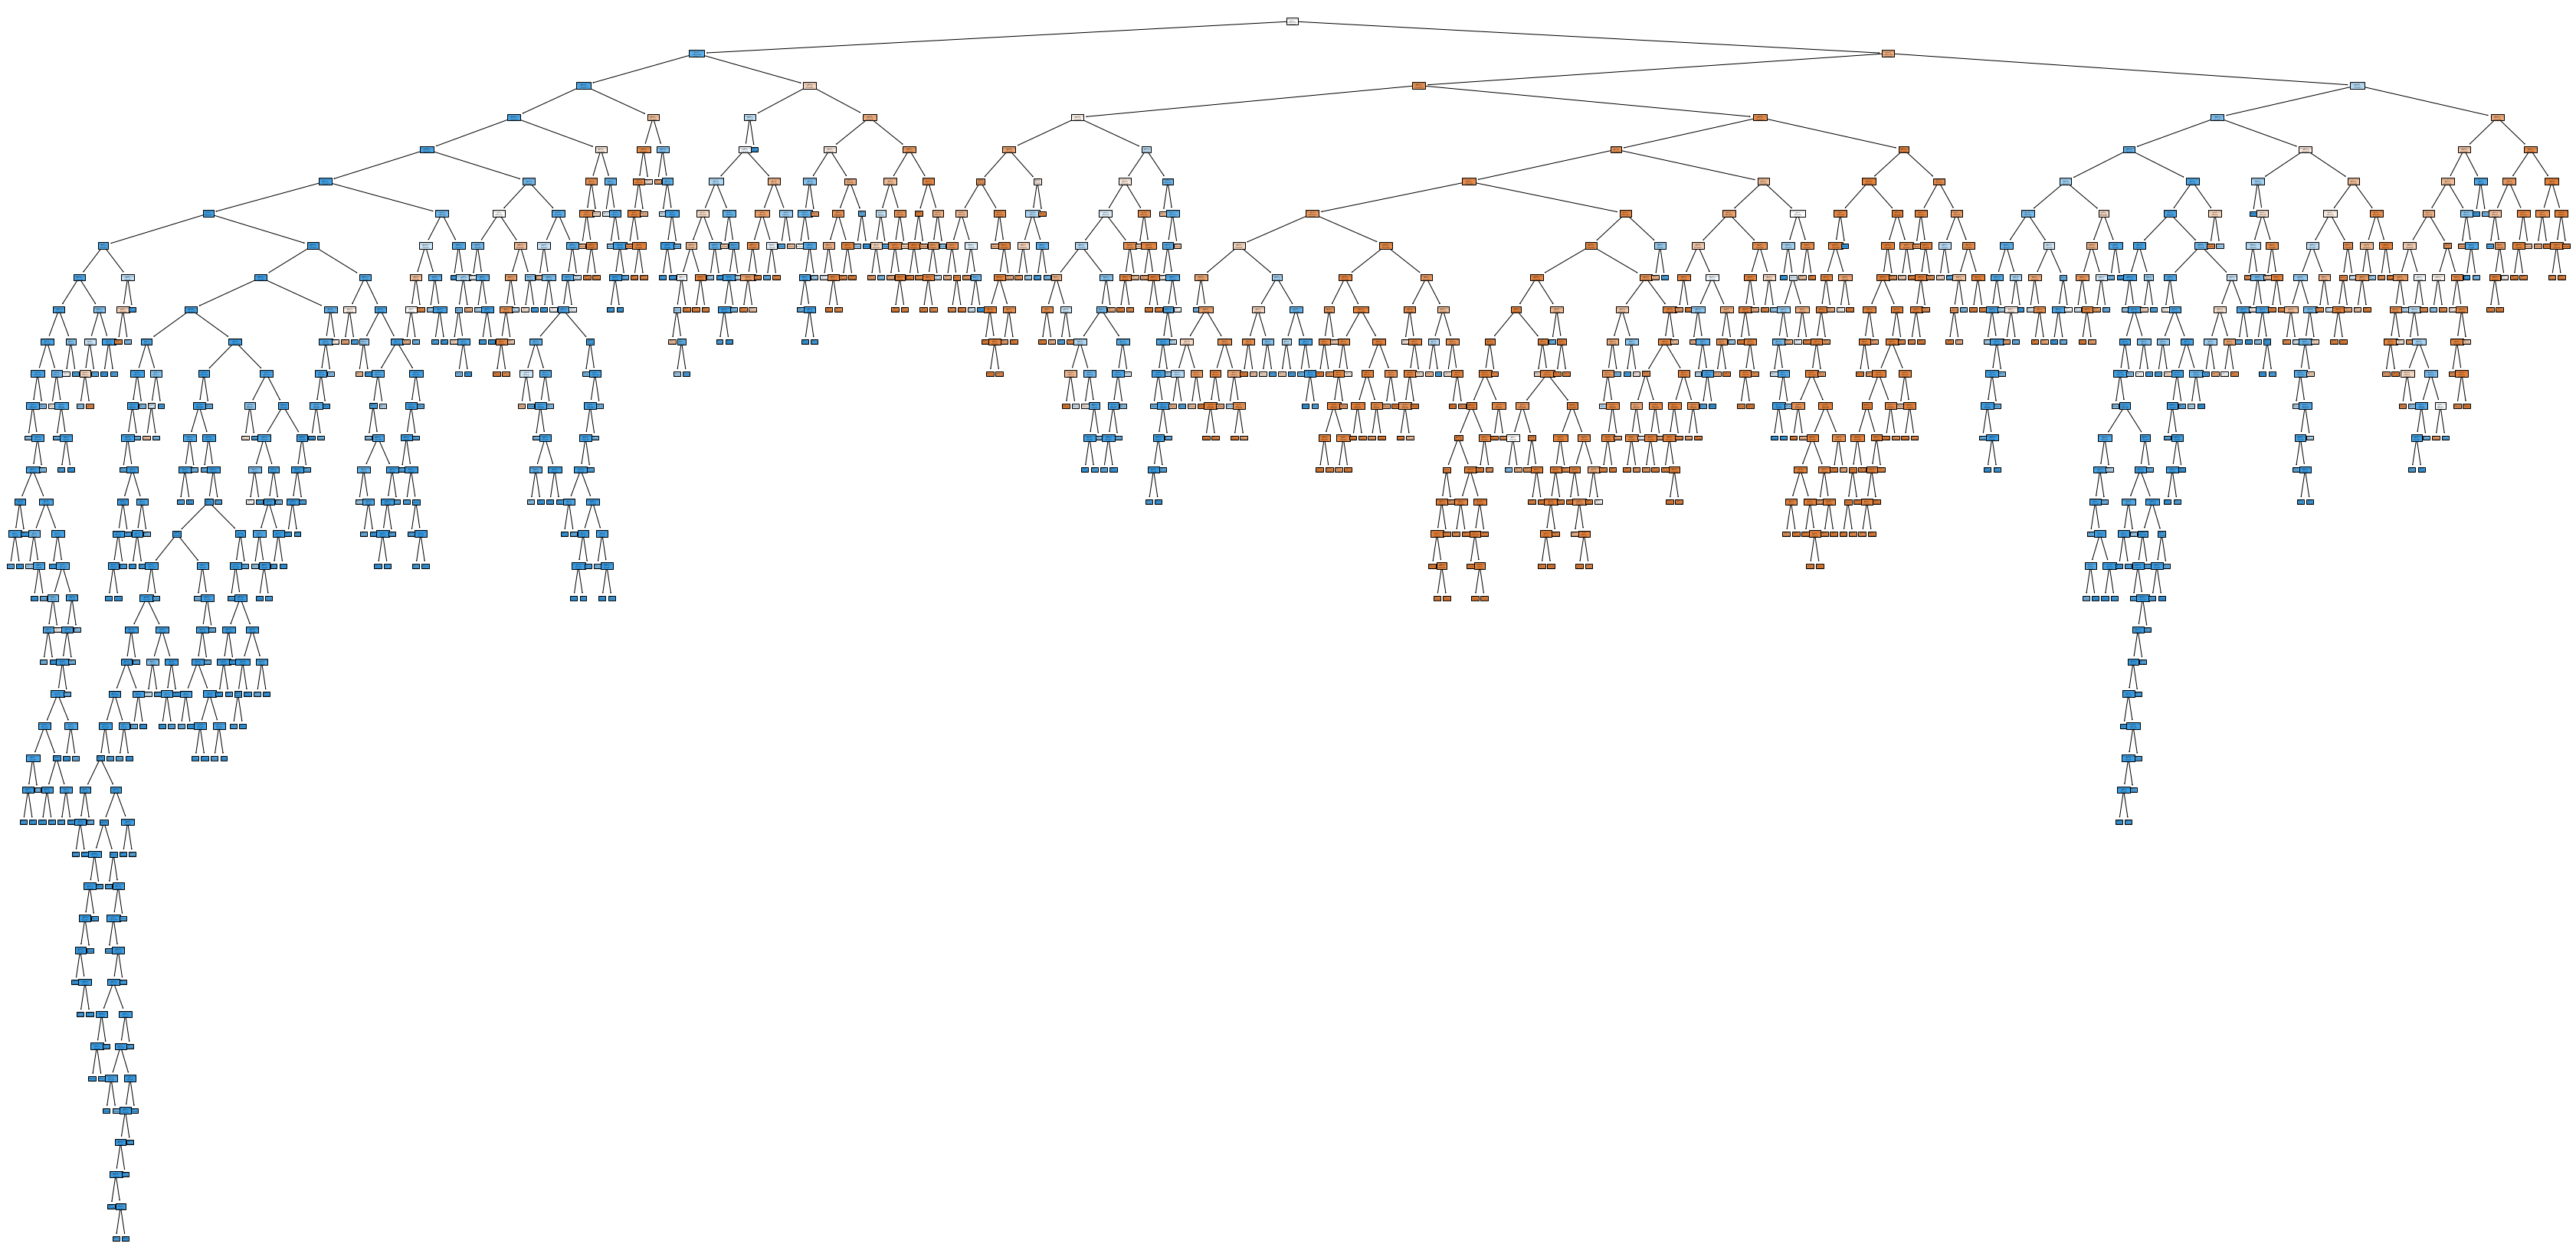

In [513]:
get_dt_gradh(dt_best.named_steps['classification'],X_train)

In [514]:
evaluate_model(dt_best,X_train,y_train,True,True)

Confusion Matrix::: [[17454  1289]
 [  308  1339]]
Recall score:  0.8129933211900425
Precison Score:  0.5095129375951294
Overall Accuracy:  0.9216772927905836
Specificity : 0.9312276583257749
                       Feature  Importance
10           loc_ic_mou_action        0.40
3           roam_og_mou_action        0.14
29  total_rech_amt_data_action        0.06
19     last_day_rch_amt_action        0.05
17       total_rech_amt_action        0.04
20        max_rech_data_action        0.03
2           roam_ic_mou_action        0.02
7        std_og_t2m_mou_action        0.02
16       total_rech_num_action        0.01
53          count_rech_2g_good        0.01
6        std_og_t2t_mou_action        0.01
18         max_rech_amt_action        0.01
21        count_rech_2g_action        0.01
34         loc_og_t2f_mou_good        0.01
39             std_og_mou_good        0.01
40             isd_og_mou_good        0.01
60         total_rech_amt_good        0.01
27                         aon    

In [515]:
evaluate_model(dt_best,X_test,y_test,True,True)

Confusion Matrix::: [[7238  795]
 [ 232  474]]
Recall score:  0.6713881019830028
Precison Score:  0.3735224586288416
Overall Accuracy:  0.8824808330472594
Specificity : 0.9010332378936885
                       Feature  Importance
10           loc_ic_mou_action        0.40
3           roam_og_mou_action        0.14
29  total_rech_amt_data_action        0.06
19     last_day_rch_amt_action        0.05
17       total_rech_amt_action        0.04
20        max_rech_data_action        0.03
2           roam_ic_mou_action        0.02
7        std_og_t2m_mou_action        0.02
16       total_rech_num_action        0.01
53          count_rech_2g_good        0.01
6        std_og_t2t_mou_action        0.01
18         max_rech_amt_action        0.01
21        count_rech_2g_action        0.01
34         loc_og_t2f_mou_good        0.01
39             std_og_mou_good        0.01
40             isd_og_mou_good        0.01
60         total_rech_amt_good        0.01
27                         aon        

### Build model for best prediction using PCA

In [516]:
# Get all the columns back which was removed for previous step due to high correlations
final_data_for_pca = orignal_data.copy()
final_data_for_pca.shape

(30001, 102)

In [517]:
final_data_for_pca.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.98,.99,.999,.9999,.99999])

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,std_og_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,total_og_mou_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,std_ic_mou_action,total_ic_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,fb_user_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good,Churn
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00
mean,508.60,234.11,335.08,12.50,19.87,78.08,151.76,5.89,1.71,235.73,148.44,157.35,1.58,307.38,1.95,6.56,0.06,551.68,62.62,146.23,14.40,223.26,13.91,27.92,2.56,44.40,279.92,0.03,11.00,1.22,9.97,584.37,160.14,92.39,72.49,1.21,0.41,105.91,351.49,62.77,58.40,0.01,0.15,1.05,0.21,0.20,0.48,1209.37,169.14,178.87,158.52,8.03,463.25,1119.27,528.61,751.80,28.75,46.72,170.16,326.25,12.77,3.46,509.20,340.12,367.35,3.63,711.11,4.28,12.93,0.70,1238.23,132.09,302.04,31.31,465.46,30.32,60.02,5.49,95.84,586.71,0.08,22.66,2.65,341.49,201.25,157.92,2.64,0.88,251.62,714.46,135.63,0.36,0.03,2.28,0.45,0.44,23.57,1321.23,984.01,1.04,128.14,0.08
std,501.96,458.45,482.06,74.13,104.72,227.37,233.66,19.50,7.21,363.37,397.56,409.10,10.93,608.98,44.71,20.31,3.32,700.48,158.91,214.88,43.31,308.32,71.34,103.34,19.90,138.81,361.18,0.11,70.60,12.78,9.27,611.25,173.21,145.18,110.57,2.54,1.28,313.38,919.02,170.17,152.63,0.11,0.41,2.54,0.62,1.10,0.50,957.68,420.97,443.54,416.73,52.38,1622.77,859.82,879.16,915.27,132.16,186.56,444.56,464.43,41.91,12.96,716.45,771.22,787.78,23.06,1166.12,89.44,34.63,4.93,1303.20,314.31,414.01,88.70,601.93,150.11,187.92,35.82,266.68,701.93,0.30,146.47,27.46,308.39,231.86,206.42,4.80,2.23,600.06,1679.97,325.51,0.78,0.20,4.83,1.

In [518]:
# Removing all outliers who are above 99%
for col in final_data_for_pca.columns:
    val1 = final_data_for_pca[col].quantile(.999)
    val2 = final_data_for_pca[col].quantile(.9999)
    if val2-val1 > 1000:
        final_data_for_pca = final_data_for_pca[final_data_for_pca[col] <= val1]
final_data = final_data[final_data["isd_ic_mou_good"] <=  2426.85]        
final_data_for_pca.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.98,.99])        

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,std_og_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,total_og_mou_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,std_ic_mou_action,total_ic_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,fb_user_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good,Churn
count,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00,28722.00
mean,477.25,216.12,315.52,10.24,17.12,69.01,147.04,5.78,1.69,221.84,140.50,145.35,1.51,287.35,1.00,6.41,0.05,516.67,57.30,140.93,13.75,211.98,11.50,24.51,2.22,38.24,260.37,0.03,8.97,1.14,9.74,546.49,153.12,88.54,70.02,1.20,0.37,100.08,313.17,56.27,52.64,0.01,0.15,1.05,0.20,0.18,0.47,1214.28,156.69,164.80,144.52,7.59,402.04,1055.74,491.80,709.91,24.37,40.72,150.62,315.05,12.54,3.40,478.23,324.90,342.91,3.45,671.26,2.38,12.58,0.69,1165.15,120.56,290.41,29.54,440.53,24.94,52.88,4.56,82.39,544.47,0.08,18.96,2.49,329.93,195.06,152.61,2.63,0.81,240.69,633.50,119.84,0.36,0.02,2.28,0.41,0.40,23.10,1245.79,864.72,1.04,114.44,0.08
std,357.98,384.42,406.66,49.15,82.26,151.37,213.10,18.24,7.22,300.66,353.12,337.81,10.27,523.80,12.09,19.26,3.29,594.57,116.73,187.80,37.10,261.09,40.69,67.61,13.69,89.87,294.25,0.11,47.21,11.68,8.83,429.64,141.17,119.66,102.76,2.45,1.05,268.19,692.03,142.95,128.02,0.10,0.40,2.45,0.56,0.89,0.50,959.98,362.33,377.61,347.93,49.94,1002.91,578.16,745.83,781.92,92.87,144.77,307.37,417.19,39.86,12.78,591.98,691.21,676.31,21.51,1018.18,23.04,30.84,5.01,1102.91,220.73,357.51,72.72,498.35,76.41,128.01,19.37,168.32,558.02,0.30,95.88,25.03,271.21,206.79,188.95,4.66,1.82,524.77,1221.69,253.30,0.77,0.19,4.69,0.99,1.52

In [519]:
final_data_for_pca.shape

(28722, 102)

In [520]:
final_data_for_pca['Churn'].value_counts()

0    26408
1     2314
Name: Churn, dtype: int64

In [521]:
X = final_data_for_pca.drop('Churn',axis=1)
y = final_data_for_pca['Churn']

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100,stratify=y)

In [523]:
## Scaling numberic values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=col)
X_test = pd.DataFrame(X_test,columns=col)

In [524]:
from sklearn.decomposition import PCA
pca = PCA(random_state=1)
pca.fit(X_train)

PCA(random_state=1)

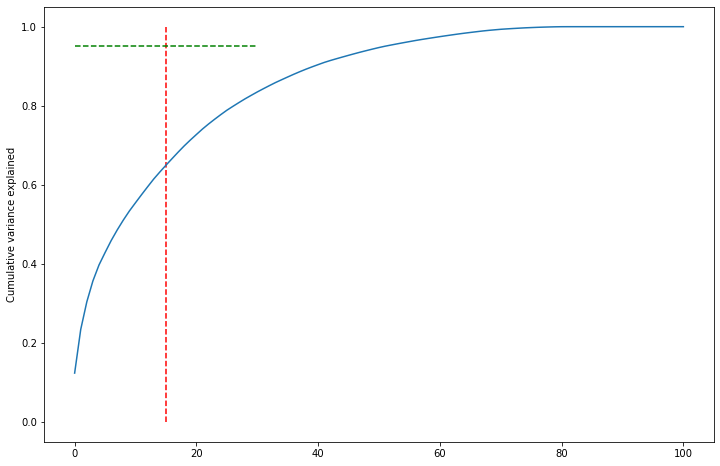

In [525]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [526]:
# Perform PCA with 20 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(20105, 30)

In [527]:
def printStatsForPCA(model,X,y):
    y_pred = model.predict(X)
    confusion = metrics.confusion_matrix(y,y_pred)
    print("Confusion Matrix:::",confusion)
    print("Recall score: ",metrics.recall_score(y,y_pred))
    print("Precison Score: ",metrics.precision_score(y,y_pred))
    print("Overall Accuracy: ",metrics.accuracy_score(y,y_pred))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Specificity :",TN / float(TN+FP))

In [528]:
X_train_pca.shape

(20105, 30)

<AxesSubplot:>

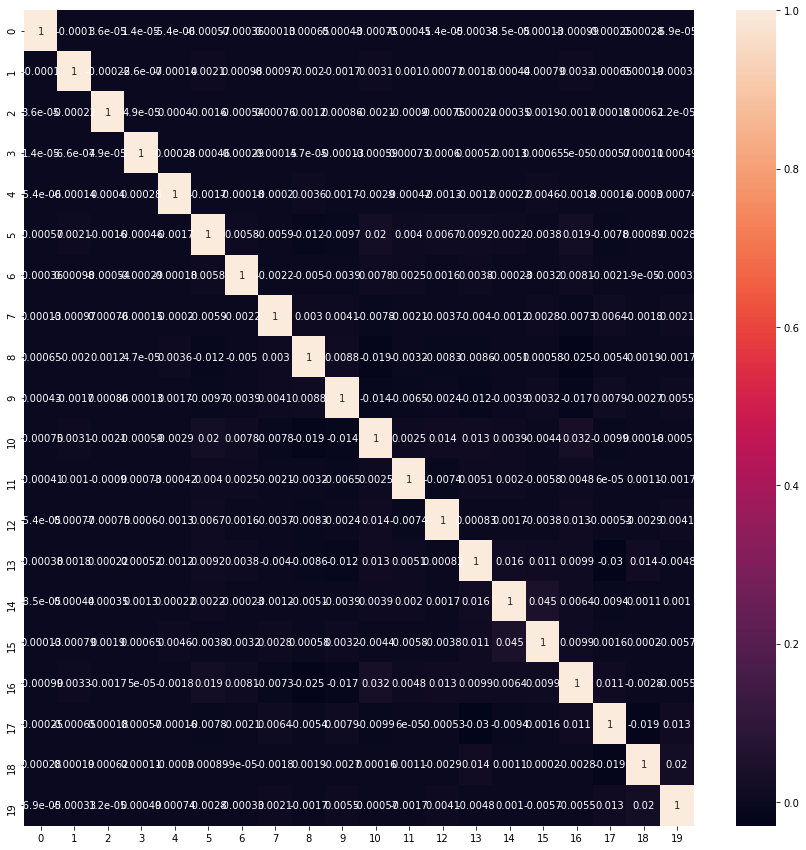

In [195]:
corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [534]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8617, 30)

### Applying Logistic Regression

In [529]:
from imblearn.pipeline import Pipeline

model = Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('classification', LogisticRegression())
    ])
hyperparameters = [{'classification__penalty': ('l1', 'l2'), 'classification__C': (0.01, 0.1, 1.0, 10,100,1000)}]

grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, n_jobs=-1, cv=5, scoring='precision',return_train_score=True)
grid_result = grid_search.fit(X_train_pca,y_train)


C:\Users\supsengu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.28408752        nan 0.28482144        nan 0.28476117
        nan 0.28482572        nan 0.28482572        nan 0.28482572]
  warnings.warn(
C:\Users\supsengu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [       nan 0.28708256        nan 0.28691391        nan 0.28689851
        nan 0.28691401        nan 0.28691401        nan 0.28691401]
  warnings.warn(


In [530]:
print(grid_result.best_estimator_)
print(grid_result.best_params_)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('classification', LogisticRegression(C=10))])
{'classification__C': 10, 'classification__penalty': 'l2'}


In [531]:
pca_final.components_

array([[ 0.14012052,  0.1502509 ,  0.17763324, ..., -0.14845774,
        -0.19164385, -0.13359994],
       [ 0.16131123, -0.00434025,  0.06913555, ...,  0.04310336,
         0.08015141,  0.17643493],
       [ 0.12809818,  0.14537056,  0.08204261, ...,  0.03984708,
        -0.01943241,  0.14013398],
       ...,
       [-0.01637363,  0.04660194,  0.06171406, ...,  0.03756076,
        -0.02398417, -0.04511383],
       [-0.01041521, -0.04938276, -0.06934291, ...,  0.19944343,
         0.06157254, -0.09741886],
       [ 0.01651217, -0.01613923, -0.05140561, ..., -0.10430566,
        -0.06832716,  0.08361057]])

In [532]:
printStatsForPCA(grid_result.best_estimator_,X_train_pca,y_train)

Confusion Matrix::: [[15203  3282]
 [  301  1319]]
Recall score:  0.8141975308641975
Precison Score:  0.2866768093892632
Overall Accuracy:  0.821785625466302
Specificity : 0.8224506356505275


In [535]:
printStatsForPCA(grid_result.best_estimator_,X_test_pca,y_test)

Confusion Matrix::: [[6460 1463]
 [ 132  562]]
Recall score:  0.8097982708933718
Precison Score:  0.27753086419753087
Overall Accuracy:  0.814900777532784
Specificity : 0.815347721822542


### Using DecisionTree

In [536]:
# Using DecisionTree classifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier(random_state=100)

model = Pipeline([
        ('sampling', SMOTE(random_state=1)),
        ('classification', dt)
    ])
hyperparameters = [{'classification__max_depth': (2,3,5,7,10,20), 
                    'classification__min_samples_leaf': (5,10,20,50,100)}]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model,
            param_grid=hyperparameters,
            cv=cv,
            n_jobs=-1,verbose=1,
            scoring="precision")

grid_result = grid_search.fit(X_train_pca,y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


In [537]:
evaluate_model(grid_result.best_estimator_,X_train_pca,y_train,False,True)

Confusion Matrix::: [[16650  1835]
 [  164  1456]]
Recall score:  0.8987654320987655
Precison Score:  0.44241871771498026
Overall Accuracy:  0.9005719970156677
Specificity : 0.9007303218826075


In [538]:
evaluate_model(grid_result.best_estimator_,X_test_pca,y_test,False,True)

Confusion Matrix::: [[6750 1173]
 [ 254  440]]
Recall score:  0.6340057636887608
Precison Score:  0.2727836329820211
Overall Accuracy:  0.8343971219682024
Specificity : 0.8519500189322227


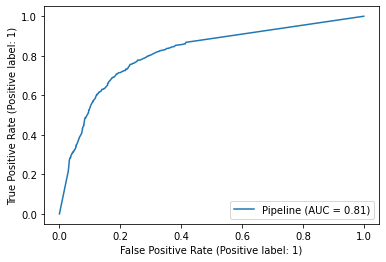

In [539]:
metrics.plot_roc_curve(grid_result.best_estimator_, X_test_pca, y_test)

### Using Random Forest 

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [540]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

model = Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('classification', rf)
    ])
hyperparameters = [{'classification__n_estimators': (10, 25, 50, 100)}]

grid_search = GridSearchCV(estimator=model,
            param_grid=hyperparameters,
            cv=5,
            n_jobs=-1,verbose=1,
            scoring="precision")

grid_result = grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [541]:
print(grid_result.best_estimator_)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('classification',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42))])


In [546]:
evaluate_model(grid_result.best_estimator_,X_train_pca,y_train,False,True)

Confusion Matrix::: [[18480     5]
 [    0  1620]]
Recall score:  1.0
Precison Score:  0.9969230769230769
Overall Accuracy:  0.9997513056453619
Specificity : 0.999729510413849


In [547]:
evaluate_model(grid_result.best_estimator_,X_test_pca,y_test,False,True)

Confusion Matrix::: [[7456  467]
 [ 296  398]]
Recall score:  0.5734870317002881
Precison Score:  0.4601156069364162
Overall Accuracy:  0.9114541023558083
Specificity : 0.9410576801716521


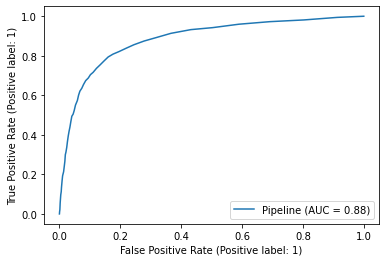

In [548]:
metrics.plot_roc_curve(grid_result.best_estimator_, X_test_pca, y_test)

### Using XGBoost

In [549]:
import xgboost as xgb

In [550]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

model = Pipeline([
        ('sampling', SMOTE(random_state=42)),
        ('classification', xgb_cfl)
    ])

hyperparameters = [{'classification__n_estimators': (100, 200, 500, 750)}]

grid_search = GridSearchCV(estimator=model,
            param_grid=hyperparameters,
            cv=5,
            n_jobs=-1,verbose=1,
            scoring="precision")

grid_result = grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\supsengu\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [551]:
evaluate_model(grid_result.best_estimator_,X_train_pca,y_train,True,False)

Confusion Matrix::: [[18485     0]
 [    0  1620]]
Recall score:  1.0
Precison Score:  1.0
Overall Accuracy:  1.0
Specificity : 1.0


In [552]:
evaluate_model(grid_result.best_estimator_,X_test_pca,y_test,True,False)

Confusion Matrix::: [[7442  481]
 [ 298  396]]
Recall score:  0.5706051873198847
Precison Score:  0.45153933865450396
Overall Accuracy:  0.9095973076476732
Specificity : 0.9392906727249779
